In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Jan-13 11:01:13 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# ADULT

## Uniform Sampling

In [2]:
path_res = '/Users/Marta/FAccT/Res-ADULT/'
path_data = 'datasets/'
filename = 'adult.csv'
sensitive = ['sex'] #OR 'race','marital-status'
df = prepare_adult_dataset(filename, path_data, sensitive)
df

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


target  age  workclass  education  marital-status  occupation  \
0           0   39          6          9               4           0   
1           0   50          5          9               2           3   
2           0   38          3         11               0           5   
3           0   53          3          1               2           5   
4           0   28          3          9               2           9   
...       ...  ...        ...        ...             ...         ...   
32556       0   27          3          7               2          12   
32557       1   40          3         11               2           6   
32558       0   58          3         11               6           0   
32559       0   22          3         11               4           0   
32560       1   52          4         11               2           3   

       relationship  race  capital-gain  capital-loss  hours-per-week  \
0                 1     4          2174             0              40   
1                 0     4             0             0              13   
2                 1     4             0             0              40   
3                 0     2             0             0              40   
4                 5     2             0             0              40   
...             ...   ...           ...           ...             ...   
32556             5     4             0             0              38   
32557             0     4             0             0              40   
32558             4     4             0             0              40   
32559             3     4             0             0              20   
32560             5     4         15024             0              40   

       native-country  sex_Female  sex_Male  
0                  38           0         1  
1                  38           0         1  
2                  38           0         1  
3                  38           0         1  
4                   4           1         0  
...               ...         ...       ...  
32556              38           1         0  
32557              38           0         1  
32558              38           1         0  
32559              38           0         1  
32560              38           1         0  

[32561 rows x 14 columns]

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['<=50K','>50K']
# dictionary={'<=50K': 0, '>50K': 1}
adClass=1
disClass=0
protected = ['sex_Female','sex_Male']#['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']
protected_feature='sexes'#'races' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr='sex_Male'
disAttr='sex_Female'

In [4]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [5]:
X_test = pd.DataFrame(X_test, columns=column_names)
X_test = X_test.sample(300)
y_test = y_test[X_test.index]
X_test = X_test.values

In [6]:
findFreq(target,protected,df)

({'sex_Female': 6721, 'sex_Male': 10592},
 {'sex_Female': 799, 'sex_Male': 4680})

In [7]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'sex_Female': 6721, 'sex_Male': 10592}
Counting labels = 1  {'sex_Female': 799, 'sex_Male': 4680}
DN  ('sex_Female', 6721)
FP  ('sex_Male', 4680)
DP  ('sex_Female', 799)
FN  ('sex_Male', 10592)
Len DN_df  6721
Len FP_df  4680
Len DP_df  799
Len FN_df  10592


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  5712
1009 to be removed
Len DN_df after sampling  5712
FP_expected  3671
1009 to be removed
Len FP_df after sampling  3671
DP_expected  1808
1009 to add
Len DP_df after sampling  1808
FN_expected  11601
1009 to add
Len FN_df after sampling  11601


In [8]:
findFreq(target,protected,df_new)

({'sex_Female': 5712, 'sex_Male': 11601},
 {'sex_Female': 1808, 'sex_Male': 3671})

In [9]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [10]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [11]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 60 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 7 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 55 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 18 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 69 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 7 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 36 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 19 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.766667            0.763333       0.760000   
Precision           0.420952            0.453092       0.433571   
Recall              0.162637            0.340659       0.285714   
F1 Score            0.232185            0.373524       0.342669   
Discrimination      0.218999            0.262901       0.078819   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.743333         CLF Original    0.003333   
Precision                  0.419589   CLF Original Blind    0.032140   
Recall                     0.330769   CLF Original Blind    0.178022   
F1 Score                   0.361123   CLF Original Blind    0.141339   
Discrimination            -0.024390  CLF Mitigated Blind    0.043902   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.016667   0.006667     0.020000  
Precision         0.013983   0.012619     0.033503  
Recall            0.045055   0.123077     0.009890  
F1 Score          0.018454   0.110484     0.012401  
Discrimination    0.103209   0.140180     0.287291

In [12]:

PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [13]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [14]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.766667            0.763333       0.760000   
Precision           0.420952            0.453092       0.433571   
Recall              0.162637            0.340659       0.285714   
F1 Score            0.232185            0.373524       0.342669   
Discrimination      0.218999            0.262901       0.078819   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.743333         CLF Original    0.003333   
Precision                  0.419589   CLF Original Blind    0.032140   
Recall                     0.330769   CLF Original Blind    0.178022   
F1 Score                   0.361123   CLF Original Blind    0.141339   
Discrimination            -0.024390  CLF Mitigated Blind    0.043902   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.016667   0.006667     0.020000  
Precision         0.013983   0.012619     0.033503  
Recall            0.045055   0.123077     0.009890  
F1 Score          0.018454   0.110484     0.012401  
Discrimination    0.103209   0.140180     0.287291

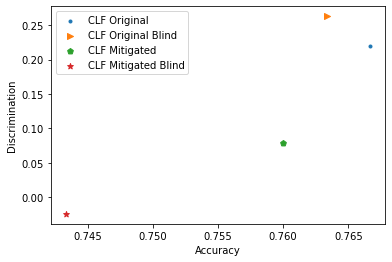

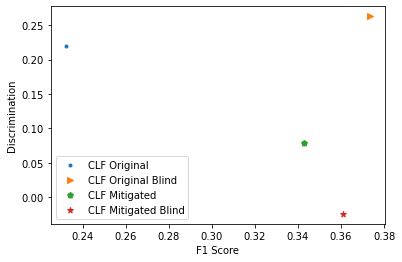

In [15]:
plotDisc(res)

In [16]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 95 instances.
    * "('sex_Male',)" grouping has 205 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 84 data points.
        - The class *>50K* has 11 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 149 data points.
        - The class *>50K* has 56 data points.


In [17]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

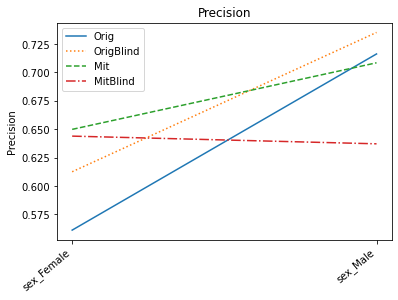

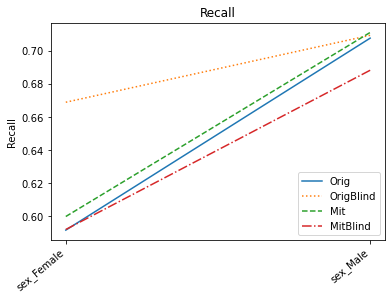

In [18]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [19]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [20]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [21]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [22]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -8.717437          -12.300213      -10.813588   
workclass                  -0.155961           -0.293568       -0.397656   
education                  -6.217258           -6.733974       -6.636348   
marital-status             -6.936485          -15.461004      -11.019802   
occupation                 -1.975313           -1.654040       -1.943585   
relationship               14.280774           -0.950829       10.658250   
race                       -0.036621           -0.101239       -0.003652   
capital-gain              -95.285868         -102.533690     -102.369044   
capital-loss              -26.903721          -29.350413      -30.383268   
hours-per-week              0.062159           -0.070560        0.354803   
native-country             -1.805073           -1.288053       -1.640701   
sex_Female                  0.739635           -0.093927        0.643572   
sex_Male                    0.860379           -0.193605        0.675125   

                clfOrigBlind-clfMitBlind  
age                           -10.204063  
workclass                      -0.051873  
education                      -6.314884  
marital-status                -11.377688  
occupation                     -1.685768  
relationship                    2.671696  
race                           -0.134208  
capital-gain                  -95.450513  
capital-loss                  -25.870867  
hours-per-week                 -0.363204  
native-country                 -1.452425  
sex_Female                      0.002136  
sex_Male                       -0.008351

In [23]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.016160            0.015964        0.021549   
workclass                   0.002647            0.002918        0.002325   
education                   0.008135            0.011660        0.011099   
marital-status              0.025247            0.014980        0.030924   
occupation                  0.006938            0.004618        0.005727   
relationship                0.017938            0.024538        0.036129   
race                        0.001640            0.002632        0.002494   
capital-gain                0.099777            0.056862        0.055457   
capital-loss                0.038910            0.026117        0.025615   
hours-per-week              0.010900            0.013679        0.010530   
native-country              0.006587            0.005824        0.005143   
sex_Female                  0.006337            0.004643        0.011028   
sex_Male                    0.007200            0.007281        0.014449   

                clfOrigBlind-clfMitBlind  
age                             0.018929  
workclass                       0.002586  
education                       0.009081  
marital-status                  0.022507  
occupation                      0.005645  
relationship                    0.050065  
race                            0.002018  
capital-gain                    0.100052  
capital-loss                    0.041557  
hours-per-week                  0.012424  
native-country                  0.011877  
sex_Female                      0.000588  
sex_Male                        0.000568

In [24]:
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.800007            0.143766        0.659349   
SA-Mean               0.006769            0.005962        0.012738   
NSA-Sum              14.761516           15.521598       16.020063   
NSA-Mean              0.021353            0.016345        0.018817   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.005244  
SA-Mean                   0.000578  
NSA-Sum                  14.143381  
NSA-Mean                  0.025158

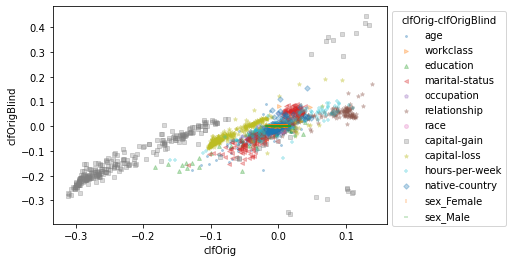

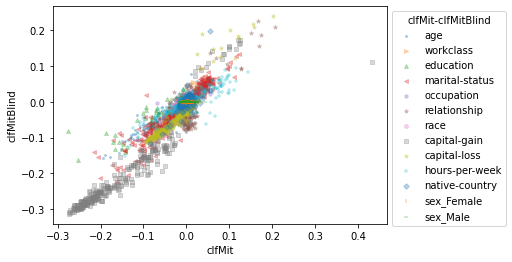

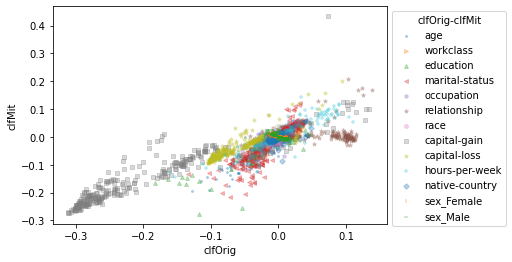

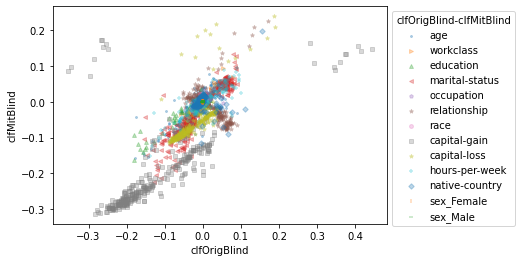

In [25]:
XAIPlots(shap_v,column_names,diffClfs=True)

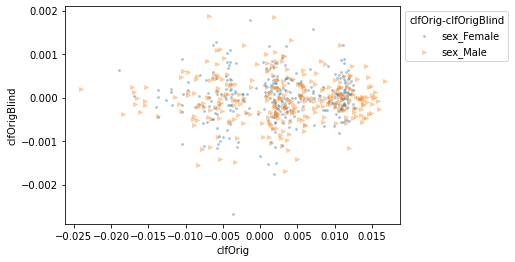

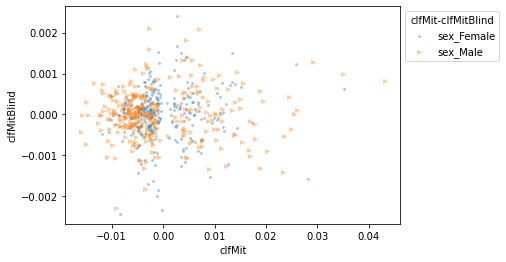

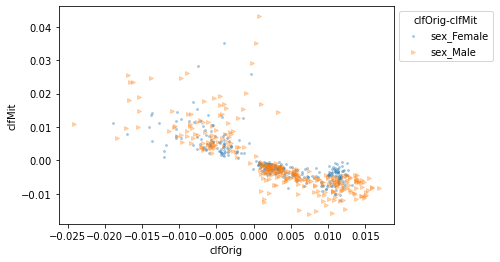

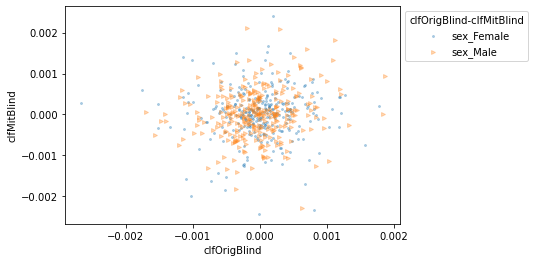

In [26]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [27]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [28]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [29]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [30]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.282083           -4.920466       -4.990694   
workclass                  -0.082426           -0.038320       -0.064487   
education                  -1.691900           -1.127945       -1.401191   
marital-status             -2.036433           -2.790076       -1.940313   
occupation                 -0.256258           -0.050221       -0.137333   
relationship                2.189204           -0.056205        1.385023   
race                       -0.100549            0.137863        0.364613   
capital-gain              -88.303693         -105.799926     -103.334561   
capital-loss                7.079159          -10.668375        8.819609   
hours-per-week             -1.311034           -1.203910       -1.329565   
native-country             -5.279434            0.567136       -1.632132   
sex_Female                 -0.045688           -0.484860       -0.261314   
sex_Male                    0.713794           -0.451991       -0.186644   

                clfOrigBlind-clfMitBlind  
age                            -1.211855  
workclass                      -0.056260  
education                      -1.418655  
marital-status                 -2.886196  
occupation                     -0.169146  
relationship                    0.747975  
race                           -0.327299  
capital-gain                  -90.769059  
capital-loss                  -12.408825  
hours-per-week                 -1.185379  
native-country                 -3.080166  
sex_Female                     -0.269235  
sex_Male                        0.448447

In [31]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.023439            0.017118        0.010879   
workclass                   0.010456            0.005799        0.006488   
education                   0.009976            0.007005        0.007678   
marital-status              0.017461            0.011278        0.027787   
occupation                  0.010058            0.005516        0.006698   
relationship                0.011259            0.011818        0.014130   
race                        0.009528            0.005969        0.006467   
capital-gain                0.142248            0.088302        0.080871   
capital-loss                0.080280            0.014798        0.072916   
hours-per-week              0.010767            0.007471        0.007509   
native-country              0.013465            0.008180        0.008378   
sex_Female                  0.010386            0.006294        0.008368   
sex_Male                    0.009326            0.006443        0.008350   

                clfOrigBlind-clfMitBlind  
age                             0.015875  
workclass                       0.009715  
education                       0.009054  
marital-status                  0.011324  
occupation                      0.008836  
relationship                    0.029116  
race                            0.009019  
capital-gain                    0.154037  
capital-loss                    0.010640  
hours-per-week                  0.010543  
native-country                  0.023572  
sex_Female                      0.009506  
sex_Male                        0.009291

In [32]:
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.379741            0.468426        0.223979   
SA-Mean               0.009856            0.006369        0.008359   
NSA-Sum               9.964743           11.578222       11.399956   
NSA-Mean              0.030813            0.016659        0.022709   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.358841  
SA-Mean                   0.009399  
NSA-Sum                  10.387347  
NSA-Mean                  0.026521

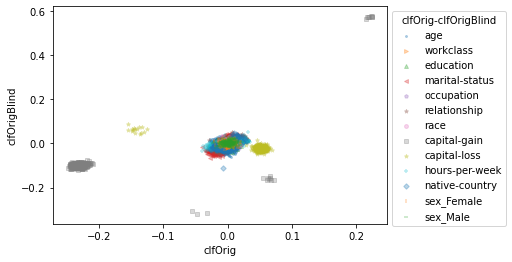

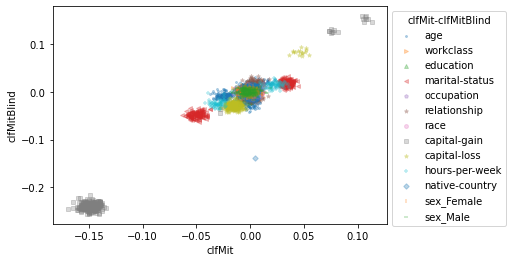

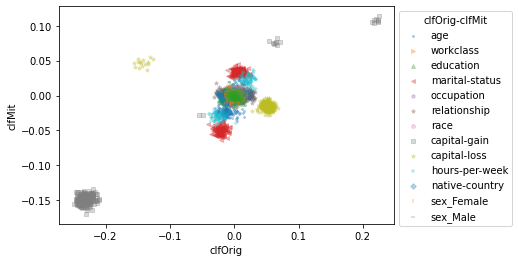

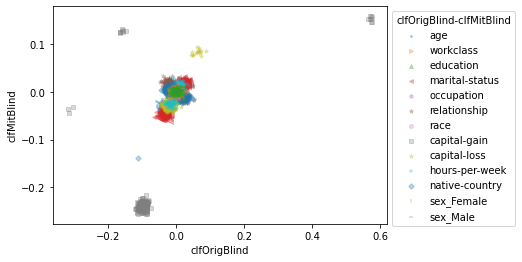

In [33]:
XAIPlots(lime_v,column_names,diffClfs=True)

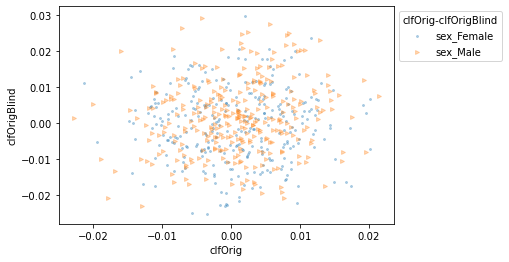

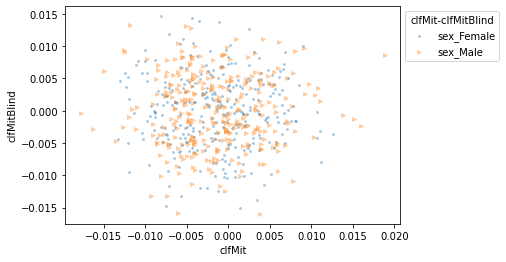

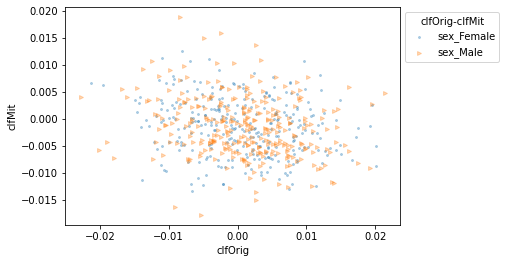

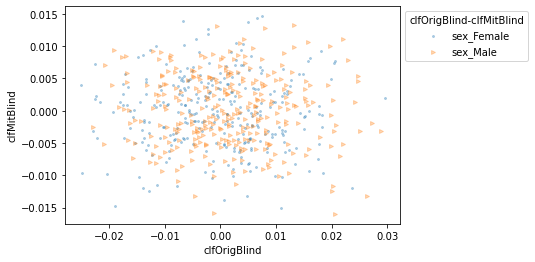

In [34]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [35]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [36]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [37]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [38]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -10.625406          -12.111909      -10.915528   
workclass                  -0.188919           -0.246268       -0.413402   
education                  -6.617837           -5.955561       -6.244357   
marital-status             -7.675463          -13.934904       -9.674005   
occupation                 -1.993245           -1.613519       -1.891131   
relationship               14.401911           -1.216864       11.037448   
race                        0.003215           -0.064333        0.008353   
capital-gain              -93.769754         -101.184092     -100.818537   
capital-loss              -31.072738          -34.794755      -34.094410   
hours-per-week             -0.288076           -0.574575       -0.023712   
native-country             -2.212913           -1.482773       -1.818839   
sex_Female                  0.717812           -0.163623        0.551351   
sex_Male                    0.851844           -0.370197        0.503266   

                clfOrigBlind-clfMitBlind  
age                           -11.821788  
workclass                      -0.021785  
education                      -6.329041  
marital-status                -11.936362  
occupation                     -1.715633  
relationship                    2.147598  
race                           -0.069471  
capital-gain                  -94.135308  
capital-loss                  -31.773083  
hours-per-week                 -0.838939  
native-country                 -1.876847  
sex_Female                      0.002839  
sex_Male                       -0.021619

In [39]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.017411            0.016153        0.020869   
workclass                   0.002840            0.002966        0.002235   
education                   0.008304            0.011630        0.010543   
marital-status              0.026157            0.015279        0.030943   
occupation                  0.006723            0.004500        0.005691   
relationship                0.018523            0.025537        0.036806   
race                        0.001685            0.002524        0.002361   
capital-gain                0.093802            0.051538        0.049335   
capital-loss                0.036722            0.029138        0.023925   
hours-per-week              0.010662            0.013264        0.010046   
native-country              0.007175            0.005852        0.005007   
sex_Female                  0.006290            0.004628        0.010955   
sex_Male                    0.007070            0.007459        0.014484   

                clfOrigBlind-clfMitBlind  
age                             0.020162  
workclass                       0.002576  
education                       0.009862  
marital-status                  0.020974  
occupation                      0.005585  
relationship                    0.051102  
race                            0.002020  
capital-gain                    0.095211  
capital-loss                    0.044569  
hours-per-week                  0.012580  
native-country                  0.012394  
sex_Female                      0.000629  
sex_Male                        0.000631

In [40]:
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.784828            0.266910        0.527309   
SA-Mean               0.006680            0.006044        0.012719   
NSA-Sum              15.349952           15.743596       16.085429   
NSA-Mean              0.020910            0.016216        0.017978   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.012229  
SA-Mean                   0.000630  
NSA-Sum                  14.787805  
NSA-Mean                  0.025185

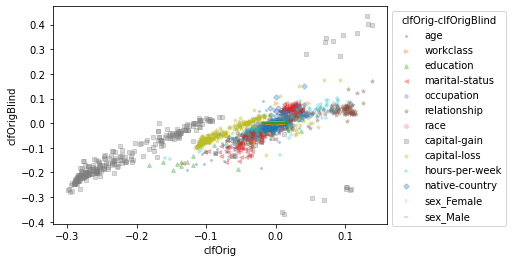

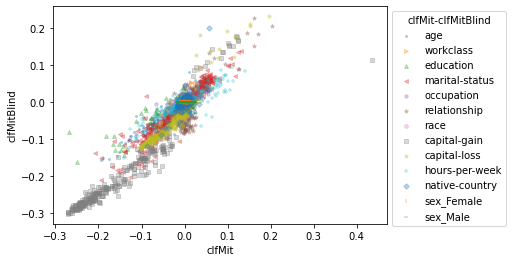

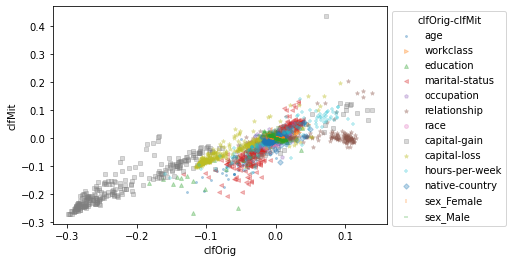

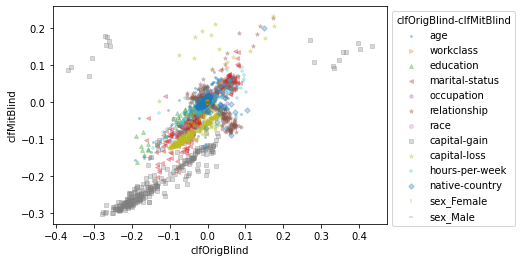

In [41]:
XAIPlots(shap_v,column_names,diffClfs=True)

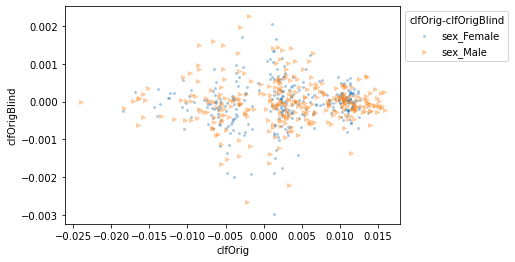

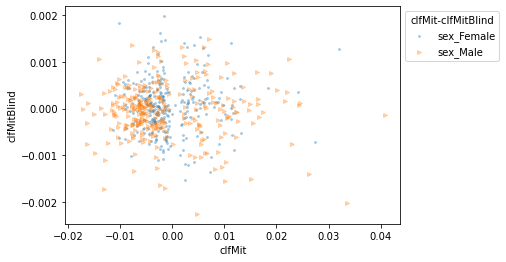

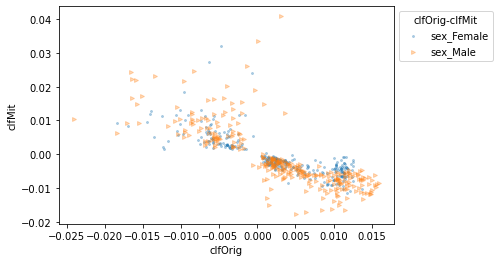

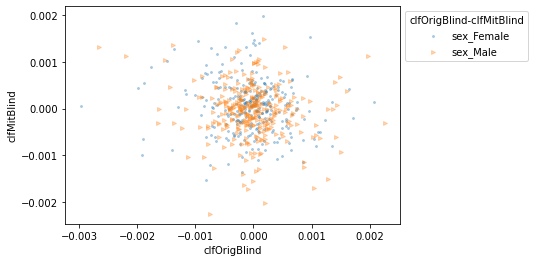

In [42]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [43]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [44]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [45]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [46]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.243703           -4.153288       -4.330744   
workclass                  -0.119824           -0.099216       -0.116244   
education                  -1.692885           -1.003691       -1.299799   
marital-status             -1.979458           -3.512300       -2.311440   
occupation                 -0.229237           -0.128044       -0.194866   
relationship                2.152008           -0.195586        1.577150   
race                       -0.070263            0.105911        0.411314   
capital-gain              -87.775175         -104.612257     -104.380300   
capital-loss                6.846493          -21.702157        4.293716   
hours-per-week             -1.287392           -0.864200       -0.997515   
native-country             -5.281433           -0.273085       -1.778894   
sex_Female                 -0.032467           -0.284946       -0.126615   
sex_Male                    0.719362           -0.524290       -0.170685   

                clfOrigBlind-clfMitBlind  
age                            -1.066248  
workclass                      -0.102796  
education                      -1.396777  
marital-status                 -3.180318  
occupation                     -0.162415  
relationship                    0.379273  
race                           -0.375666  
capital-gain                  -88.007132  
capital-loss                  -19.149380  
hours-per-week                 -1.154078  
native-country                 -3.775623  
sex_Female                     -0.190798  
sex_Male                        0.365758

In [47]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.023441            0.014053        0.010280   
workclass                   0.010341            0.006146        0.006664   
education                   0.010101            0.006876        0.007131   
marital-status              0.017798            0.011932        0.026024   
occupation                  0.009986            0.005897        0.006876   
relationship                0.011502            0.013085        0.013895   
race                        0.009616            0.006240        0.006347   
capital-gain                0.140306            0.074634        0.073201   
capital-loss                0.081331            0.021218        0.090360   
hours-per-week              0.010574            0.008780        0.007759   
native-country              0.013555            0.006854        0.008284   
sex_Female                  0.010443            0.006636        0.008148   
sex_Male                    0.009366            0.006718        0.008759   

                clfOrigBlind-clfMitBlind  
age                             0.016885  
workclass                       0.009901  
education                       0.009438  
marital-status                  0.011522  
occupation                      0.009438  
relationship                    0.030001  
race                            0.009376  
capital-gain                    0.144808  
capital-loss                    0.030240  
hours-per-week                  0.010196  
native-country                  0.020329  
sex_Female                      0.009723  
sex_Male                        0.009396

In [48]:
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.375915            0.404618        0.148650   
SA-Mean               0.009905            0.006677        0.008453   
NSA-Sum               9.879806           12.422703       11.062907   
NSA-Mean              0.030777            0.015974        0.023347   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.278278  
SA-Mean                   0.009560  
NSA-Sum                  10.795428  
NSA-Mean                  0.027467

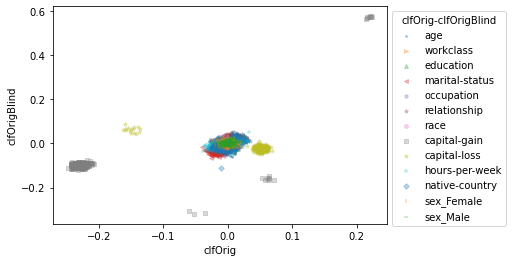

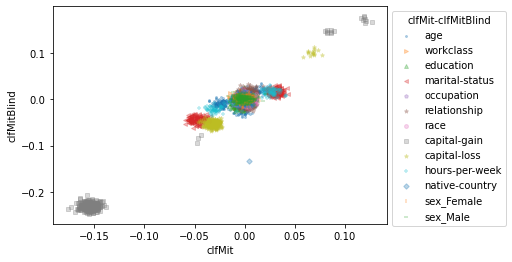

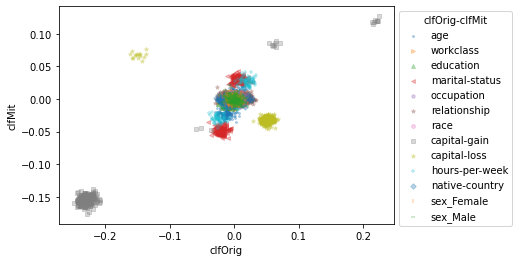

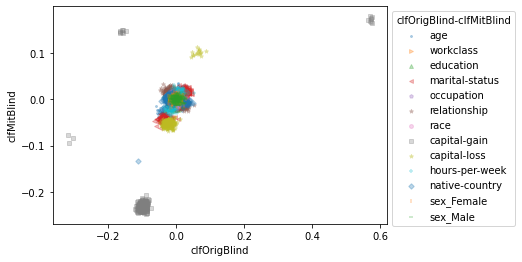

In [49]:
XAIPlots(lime_v,column_names,diffClfs=True)

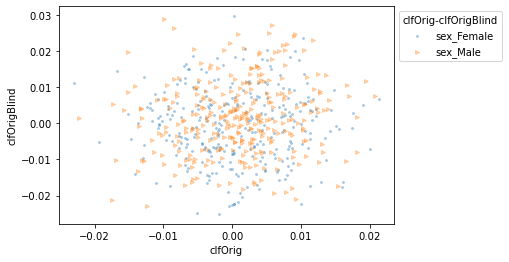

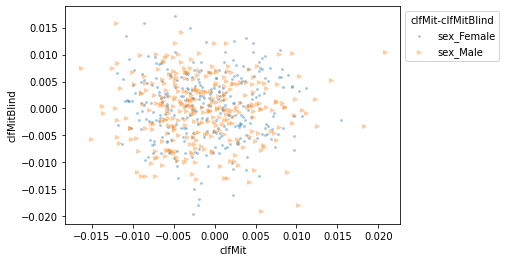

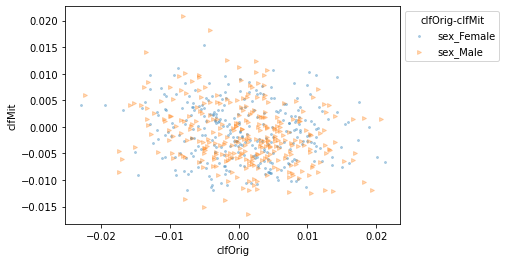

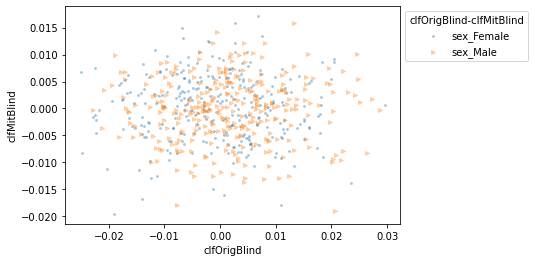

In [50]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [51]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [52]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [53]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -7.559920     -14.169196                 -11.782924   
workclass             -0.323292      -0.487765                  -0.021587   
education             -5.013078      -7.867626                  -7.822016   
marital-status        -7.142641     -13.551165                  -7.469307   
occupation            -1.897988      -1.936727                  -2.070570   
relationship          18.670870       3.024828                  10.011815   
race                   0.013131      -0.008430                  -0.046537   
capital-gain        -115.687892     -87.499689                 -73.367730   
capital-loss         -38.741745     -25.735933                 -19.234714   
hours-per-week         0.417474      -0.086383                  -0.643390   
native-country        -1.592243      -1.867296                  -2.425742   
sex_Female             1.473199      -0.278276                  -0.015751   
sex_Male               1.728566      -0.550175                  -0.016343   

                clfMitBlind-clfMitBlind  
age                          -10.242926  
workclass                     -0.052071  
education                     -4.821909  
marital-status               -15.844743  
occupation                    -1.330832  
relationship                  -5.192522  
race                          -0.157142  
capital-gain                -116.218092  
capital-loss                 -38.409235  
hours-per-week                -0.558752  
native-country                -0.903530  
sex_Female                     0.020726  
sex_Male                      -0.013627

In [54]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.000700       0.001324                   0.005818   
workclass              0.000404       0.000643                   0.000664   
education              0.000553       0.001805                   0.001341   
marital-status         0.000833       0.003849                   0.003211   
occupation             0.000428       0.000788                   0.000719   
relationship           0.000865       0.001588                   0.000891   
race                   0.000411       0.000632                   0.000587   
capital-gain           0.006190       0.001096                   0.002173   
capital-loss           0.005773       0.007378                   0.008871   
hours-per-week         0.000633       0.001867                   0.001770   
native-country         0.000564       0.000975                   0.001303   
sex_Female             0.000416       0.000671                   0.000566   
sex_Male               0.000398       0.000806                   0.000576   

                clfMitBlind-clfMitBlind  
age                            0.001199  
workclass                      0.000727  
education                      0.001167  
marital-status                 0.001879  
occupation                     0.000676  
relationship                   0.001734  
race                           0.000696  
capital-gain                   0.005068  
capital-loss                   0.010807  
hours-per-week                 0.001035  
native-country                 0.001071  
sex_Female                     0.000604  
sex_Male                       0.000618

In [55]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           1.600882       0.414225                   0.016047   
SA-Mean          0.000407       0.000739                   0.000571   
NSA-Sum         17.914571      14.203185                  12.263303   
NSA-Mean         0.001578       0.001995                   0.002486   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.017177  
SA-Mean                  0.000611  
NSA-Sum                 17.611978  
NSA-Mean                 0.002369

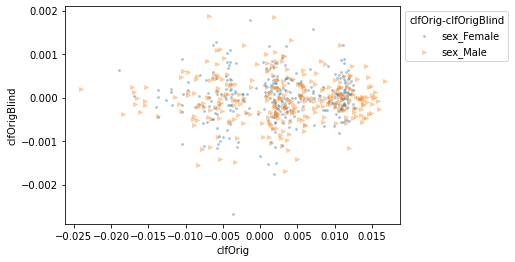

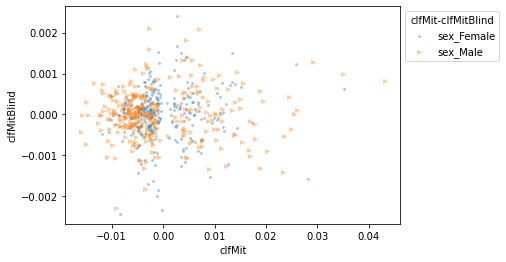

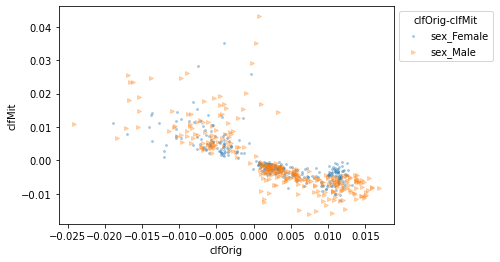

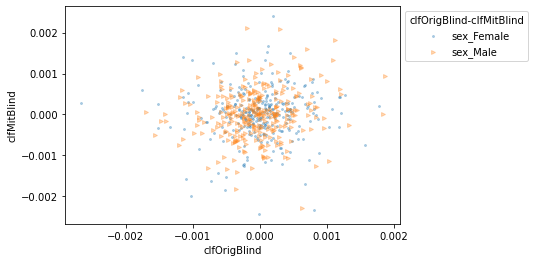

In [56]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [57]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [58]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [59]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -3.256118      -6.065319                   0.730332   
workclass             -0.173157      -0.007574                  -0.029093   
education             -1.429965      -1.271024                  -1.954820   
marital-status        -3.327858      -0.923895                  -0.688032   
occupation            -0.176138      -0.156062                  -0.309358   
relationship           2.193737       0.768436                   2.147475   
race                   0.228271       0.547656                  -0.399083   
capital-gain        -125.258845     -82.456016                 -50.820023   
capital-loss          24.970931     -11.857606                 -11.045280   
hours-per-week        -0.916731      -1.410348                  -1.681695   
native-country        -2.528750      -0.882276                  -8.032116   
sex_Female             0.376353      -0.764282                  -0.454508   
sex_Male               0.535011      -0.892341                   0.898145   

                clfMitBlind-clfMitBlind  
age                           -3.008435  
workclass                     -0.129962  
education                     -0.860612  
marital-status                -5.378481  
occupation                    -0.022203  
relationship                  -1.020227  
race                          -0.303882  
capital-gain                -127.956168  
capital-loss                 -20.512926  
hours-per-week                -0.657763  
native-country                 1.176327  
sex_Female                    -0.005524  
sex_Male                      -0.083940

In [60]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001057       0.003964                   0.000078   
workclass              0.001102       0.001608                   0.000070   
education              0.001212       0.003428                   0.000068   
marital-status         0.001046       0.003416                   0.000070   
occupation             0.001217       0.001866                   0.000080   
relationship           0.001205       0.003347                   0.000075   
race                   0.001126       0.001541                   0.000069   
capital-gain           0.002037       0.006332                   0.000069   
capital-loss           0.001988       0.016981                   0.001558   
hours-per-week         0.001290       0.003120                   0.000071   
native-country         0.001106       0.001429                   0.000064   
sex_Female             0.001062       0.001728                   0.000076   
sex_Male               0.001107       0.001705                   0.000073   

                clfMitBlind-clfMitBlind  
age                            0.003991  
workclass                      0.002149  
education                      0.002128  
marital-status                 0.004505  
occupation                     0.002653  
relationship                   0.005098  
race                           0.002301  
capital-gain                   0.010177  
capital-loss                   0.023501  
hours-per-week                 0.002542  
native-country                 0.003645  
sex_Female                     0.002229  
sex_Male                       0.002517

In [61]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.455682       0.828312                   0.676327   
SA-Mean          0.001085       0.001717                   0.000075   
NSA-Sum         14.950955       9.667837                   7.076119   
NSA-Mean         0.001308       0.004276                   0.000207   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.044732  
SA-Mean                  0.002373  
NSA-Sum                 14.638817  
NSA-Mean                 0.005699

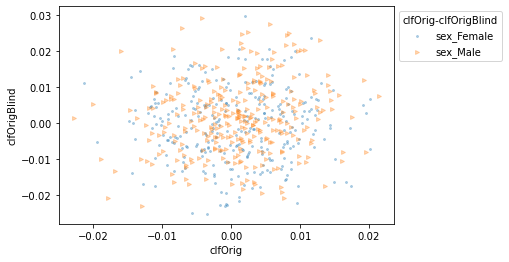

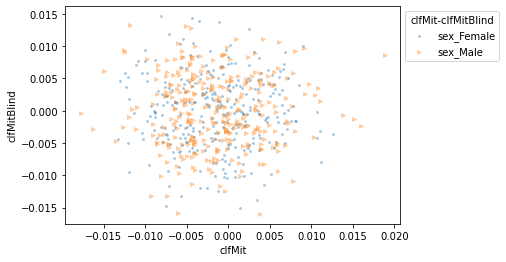

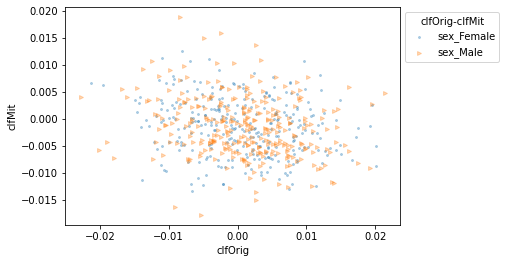

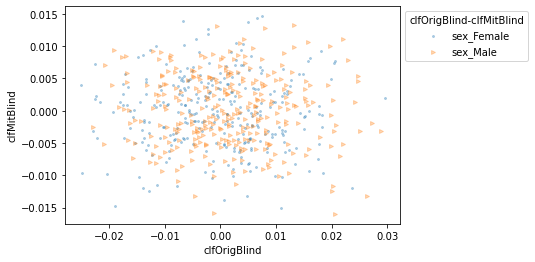

In [62]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [63]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [64]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 41 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 3 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 14 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 13 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 45 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 3 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 205 ] Labeled as + class: [ 14 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 95 ] Labeled as + class: [ 13 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.790000            0.793333       0.790000   
Precision           0.510714            0.538384       0.516348   
Recall              0.356044            0.416484       0.385714   
F1 Score            0.402944            0.454048       0.425699   
Discrimination      0.168421            0.187933      -0.068549   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.783333  CLF Original Blind    0.003333   
Precision                  0.502540  CLF Original Blind    0.027670   
Recall                     0.370330  CLF Original Blind    0.060440   
F1 Score                   0.409348  CLF Original Blind    0.051103   
Discrimination            -0.068549       CLF Mitigated    0.019512   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.006667   0.000000     0.010000  
Precision         0.013809   0.005634     0.035844  
Recall            0.015385   0.029670     0.046154  
F1 Score          0.016351   0.022755     0.044700  
Discrimination    0.000000   0.236970     0.256483

In [65]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [66]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [67]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.790000            0.793333       0.790000   
Precision           0.510714            0.538384       0.516348   
Recall              0.356044            0.416484       0.385714   
F1 Score            0.402944            0.454048       0.425699   
Discrimination      0.168421            0.187933      -0.068549   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.783333  CLF Original Blind    0.003333   
Precision                  0.502540  CLF Original Blind    0.027670   
Recall                     0.370330  CLF Original Blind    0.060440   
F1 Score                   0.409348  CLF Original Blind    0.051103   
Discrimination            -0.068549       CLF Mitigated    0.019512   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.006667   0.000000     0.010000  
Precision         0.013809   0.005634     0.035844  
Recall            0.015385   0.029670     0.046154  
F1 Score          0.016351   0.022755     0.044700  
Discrimination    0.000000   0.236970     0.256483

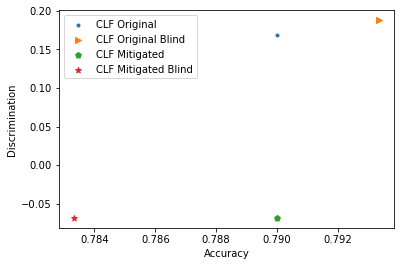

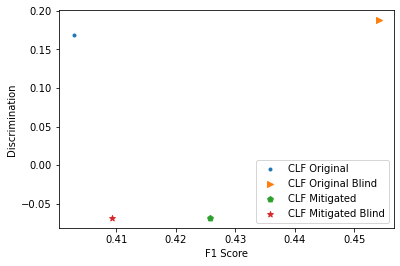

In [68]:
plotDisc(res)

In [69]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 95 instances.
    * "('sex_Male',)" grouping has 205 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 84 data points.
        - The class *>50K* has 11 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 149 data points.
        - The class *>50K* has 56 data points.


In [70]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

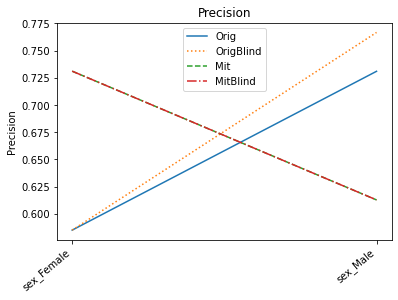

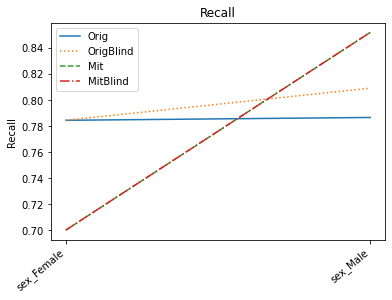

In [71]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [72]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [73]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [74]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [75]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -10.975634          -13.248804      -11.850859   
workclass                   0.328277            0.204811        0.331646   
education                  -6.432605           -8.096711       -7.614982   
marital-status             -3.195047           -5.003956       -3.302625   
occupation                  9.272930           10.627964        9.666844   
relationship               35.710509           21.671388       27.308513   
race                       -0.074171            0.100195       -0.008155   
capital-gain              -83.322047          -86.347581      -82.732971   
capital-loss              -17.053305          -13.813684      -16.827249   
hours-per-week             -5.529854           -5.889621       -5.873381   
native-country              0.215158            0.274420        0.162134   
sex_Female                  0.274442            0.425816        0.701485   
sex_Male                    0.342794            0.272461        0.617179   

                clfOrigBlind-clfMitBlind  
age                           -12.373578  
workclass                       0.201443  
education                      -6.914334  
marital-status                 -4.896378  
occupation                     10.234050  
relationship                   30.073384  
race                            0.034178  
capital-gain                  -86.936658  
capital-loss                  -14.039740  
hours-per-week                 -5.546094  
native-country                  0.327445  
sex_Female                     -0.001227  
sex_Male                       -0.001924

In [76]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002550            0.003057        0.004716   
workclass                   0.000558            0.000544        0.001149   
education                   0.002671            0.001502        0.004257   
marital-status              0.006783            0.002966        0.011903   
occupation                  0.002020            0.001620        0.003330   
relationship                0.007236            0.003260        0.042814   
race                        0.000237            0.000368        0.000427   
capital-gain                0.008371            0.008144        0.008352   
capital-loss                0.008835            0.001200        0.009894   
hours-per-week              0.002738            0.003682        0.004136   
native-country              0.000341            0.000456        0.000619   
sex_Female                  0.007816            0.002338        0.009219   
sex_Male                    0.006779            0.002010        0.007910   

                clfOrigBlind-clfMitBlind  
age                             0.007398  
workclass                       0.001129  
education                       0.005241  
marital-status                  0.009403  
occupation                      0.003766  
relationship                    0.043319  
race                            0.000565  
capital-gain                    0.008647  
capital-loss                    0.003630  
hours-per-week                  0.005047  
native-country                  0.000500  
sex_Female                      0.000156  
sex_Male                        0.000169

In [77]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.308618            0.349138        0.659332   
SA-Mean               0.007298            0.002174        0.008565   
NSA-Sum              15.646322           15.025376       15.061760   
NSA-Mean              0.003849            0.002436        0.008327   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.001576  
SA-Mean                   0.000163  
NSA-Sum                  15.597935  
NSA-Mean                  0.008058

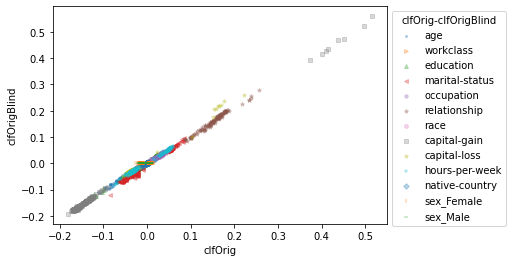

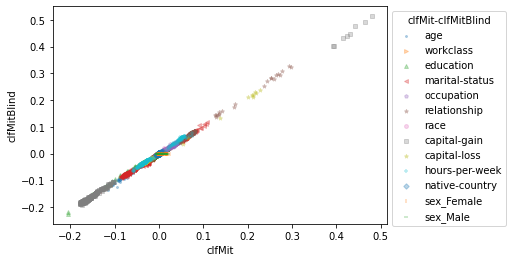

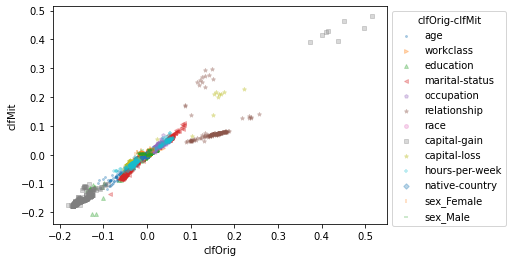

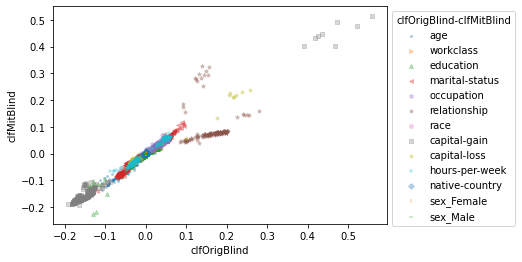

In [78]:
XAIPlots(shap_v,column_names,diffClfs=True)

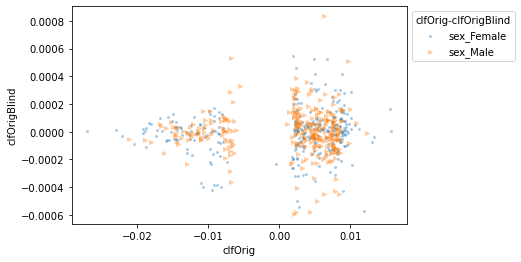

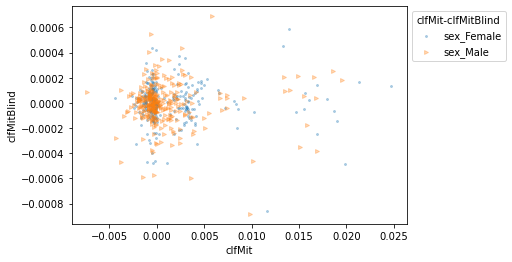

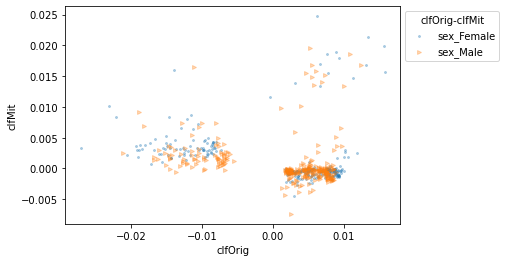

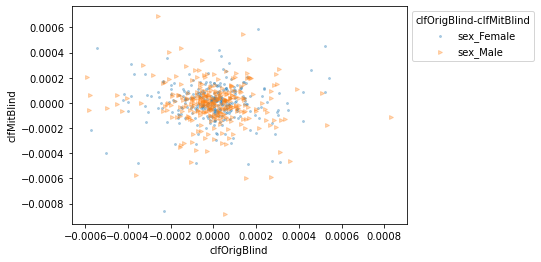

In [79]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [80]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [81]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [82]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [83]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.331051           -1.381389       -1.266705   
workclass                  -0.004994           -0.145475       -0.084289   
education                   1.058156            0.276001        0.691545   
marital-status              4.255429            1.110925        2.350906   
occupation                  0.179296            0.218402        0.238487   
relationship               -5.544114           -7.454491       -7.099368   
race                        0.066242            0.013738        0.038542   
capital-gain               -6.996381           -7.707141       -7.125587   
capital-loss               -0.026873            0.396224        0.229650   
hours-per-week             -0.394326           -0.137912       -0.212427   
native-country             -0.011662           -0.049968       -0.038576   
sex_Female                  0.928139           -0.077647        0.850492   
sex_Male                    0.603899            0.019606        0.623505   

                clfOrigBlind-clfMitBlind  
age                            -1.445734  
workclass                      -0.066181  
education                       0.642612  
marital-status                  3.015448  
occupation                      0.159211  
relationship                   -5.899238  
race                            0.041438  
capital-gain                   -7.577935  
capital-loss                    0.139700  
hours-per-week                 -0.319812  
native-country                 -0.023053  
sex_Female                      0.000000  
sex_Male                        0.000000

In [84]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002915            0.002866        0.005380   
workclass                   0.000703            0.000750        0.001643   
education                   0.002825            0.001490        0.004180   
marital-status              0.006476            0.002877        0.014366   
occupation                  0.001765            0.001224        0.002906   
relationship                0.008981            0.003196        0.054362   
race                        0.000184            0.000456        0.000456   
capital-gain                0.001848            0.002201        0.003271   
capital-loss                0.002151            0.000776        0.001565   
hours-per-week              0.002730            0.002627        0.004998   
native-country              0.000344            0.000234        0.000390   
sex_Female                  0.011950            0.001798        0.013424   
sex_Male                    0.008581            0.001855        0.010219   

                clfOrigBlind-clfMitBlind  
age                             0.006352  
workclass                       0.001572  
education                       0.004558  
marital-status                  0.010586  
occupation                      0.003269  
relationship                    0.060204  
race                            0.000549  
capital-gain                    0.003401  
capital-loss                    0.001301  
hours-per-week                  0.003825  
native-country                  0.000246  
sex_Female                      0.000000  
sex_Male                        0.000000

In [85]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.766019            0.048627        0.736998   
SA-Mean               0.010266            0.001826        0.011821   
NSA-Sum               1.806229            1.717424        1.761462   
NSA-Mean              0.002811            0.001700        0.008501   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   1.757306  
NSA-Mean                  0.008715

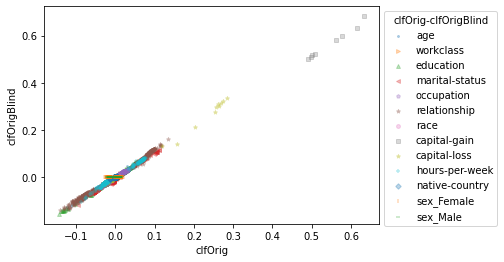

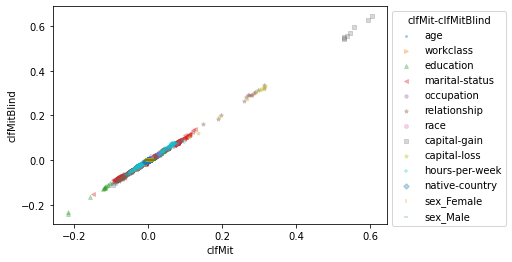

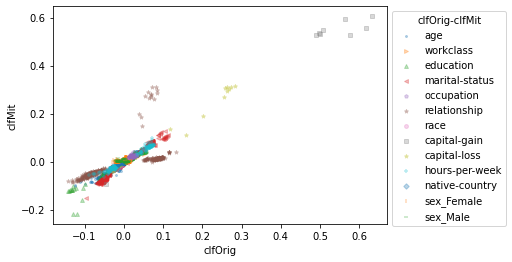

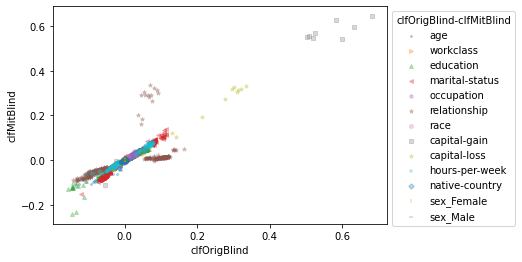

In [86]:
XAIPlots(shap_v,column_names,diffClfs=True)

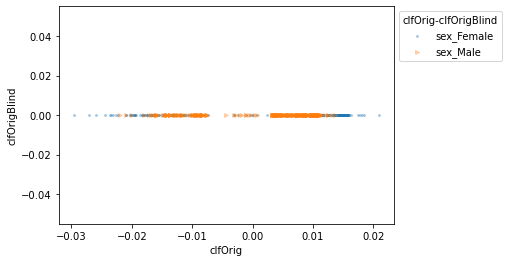

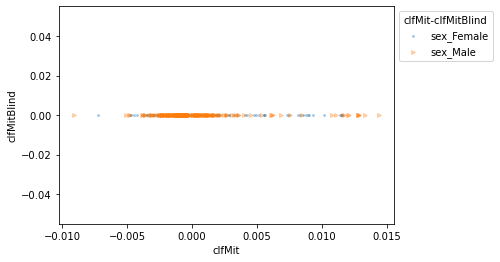

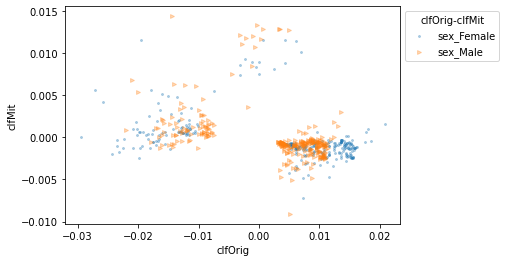

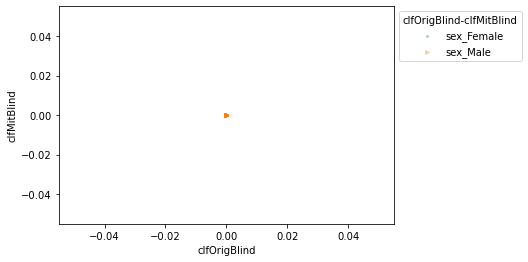

In [87]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [88]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [89]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [90]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [91]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -8.832806           -8.406924       -8.535574   
workclass                  -0.257916           -0.264307       -0.326939   
education                  -3.825498           -2.066999       -3.253647   
marital-status              2.742252            1.620472        1.624536   
occupation                  3.144534            3.981705        3.915668   
relationship                7.502317            4.408293        5.476364   
race                       -0.189021            0.226969        0.166632   
capital-gain             -118.086874         -116.982430     -113.798307   
capital-loss              -19.123560          -16.695780      -16.691242   
hours-per-week             -8.431010          -10.275648       -9.790616   
native-country              1.305152            1.051202        1.308676   
sex_Female                 -0.599542            0.246199       -0.419932   
sex_Male                    0.119269            0.179018        0.091554   

                clfOrigBlind-clfMitBlind  
age                            -8.704156  
workclass                      -0.195284  
education                      -2.638850  
marital-status                  2.738188  
occupation                      3.210571  
relationship                    6.434245  
race                           -0.128684  
capital-gain                 -121.270997  
capital-loss                  -19.128098  
hours-per-week                 -8.916042  
native-country                  1.047678  
sex_Female                      0.066588  
sex_Male                        0.206732

In [92]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012064            0.010467        0.012342   
workclass                   0.010621            0.009640        0.009990   
education                   0.012592            0.011752        0.013127   
marital-status              0.014071            0.010087        0.016997   
occupation                  0.009516            0.009996        0.010698   
relationship                0.014931            0.010821        0.015697   
race                        0.010098            0.010225        0.009463   
capital-gain                0.012896            0.016897        0.008488   
capital-loss                0.011169            0.009939        0.010238   
hours-per-week              0.011157            0.011955        0.011650   
native-country              0.009212            0.008689        0.009085   
sex_Female                  0.013400            0.010778        0.014727   
sex_Male                    0.013125            0.010078        0.014458   

                clfOrigBlind-clfMitBlind  
age                             0.010645  
workclass                       0.010946  
education                       0.010747  
marital-status                  0.011510  
occupation                      0.010261  
relationship                    0.028354  
race                            0.010512  
capital-gain                    0.007009  
capital-loss                    0.011711  
hours-per-week                  0.012932  
native-country                  0.009672  
sex_Female                      0.010481  
sex_Male                        0.010449

In [93]:
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.359405            0.212608        0.255743   
SA-Mean               0.013262            0.010428        0.014592   
NSA-Sum              15.767358           15.089157       14.989836   
NSA-Mean              0.011666            0.010952        0.011616   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.136660  
SA-Mean                   0.010465  
NSA-Sum                  15.855708  
NSA-Mean                  0.012209

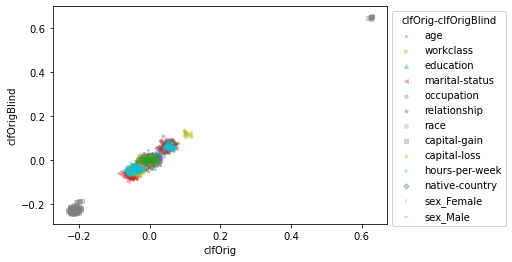

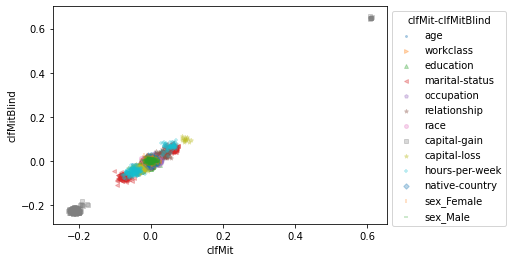

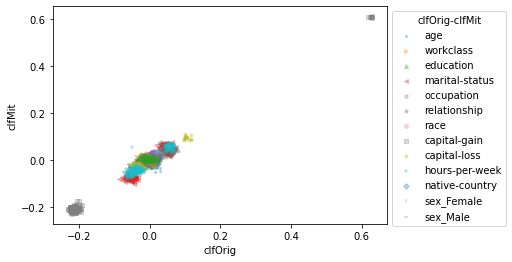

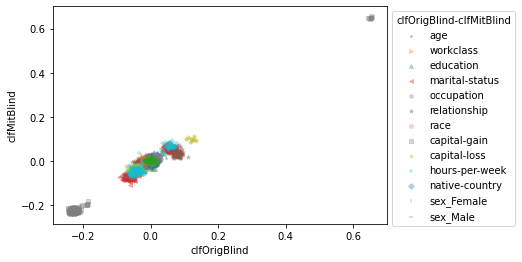

In [94]:
XAIPlots(lime_v,column_names,diffClfs=True)

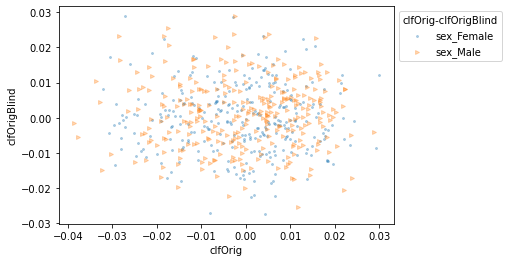

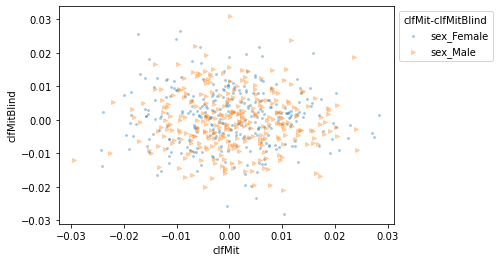

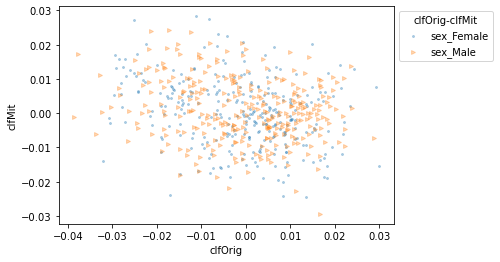

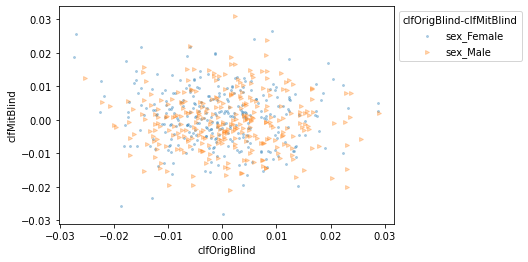

In [95]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [96]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [97]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [98]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [99]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -11.338855          -13.523489      -11.996284   
workclass                   0.339724            0.089135        0.252060   
education                  -6.426521           -7.422720       -6.735615   
marital-status             -6.185740           -4.866192       -4.603536   
occupation                  9.652580            9.934193        9.870378   
relationship               35.221803           22.913639       28.788958   
race                       -0.030875            0.027915       -0.012265   
capital-gain              -81.437360          -84.211239      -81.414067   
capital-loss              -18.034622          -17.128851      -17.173610   
hours-per-week             -4.523028           -5.160119       -5.063763   
native-country              0.200751            0.256703        0.155106   
sex_Female                  0.434476            0.345704        0.781237   
sex_Male                    0.582196            0.302056        0.889024   

                clfOrigBlind-clfMitBlind  
age                           -12.866060  
workclass                       0.176799  
education                      -7.113625  
marital-status                 -6.448397  
occupation                      9.716395  
relationship                   29.346484  
race                            0.009305  
capital-gain                  -84.234532  
capital-loss                  -17.989863  
hours-per-week                 -4.619383  
native-country                  0.302348  
sex_Female                     -0.001057  
sex_Male                       -0.004772

In [100]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002572            0.003003        0.005473   
workclass                   0.000572            0.000577        0.001281   
education                   0.002783            0.001459        0.004321   
marital-status              0.007483            0.002572        0.011511   
occupation                  0.002054            0.001662        0.003018   
relationship                0.003841            0.003104        0.043031   
race                        0.000251            0.000407        0.000384   
capital-gain                0.008772            0.003289        0.010342   
capital-loss                0.003943            0.001860        0.002708   
hours-per-week              0.003174            0.003523        0.004107   
native-country              0.000320            0.000458        0.000579   
sex_Female                  0.007886            0.002391        0.009294   
sex_Male                    0.007104            0.002014        0.008244   

                clfOrigBlind-clfMitBlind  
age                             0.007147  
workclass                       0.001150  
education                       0.004407  
marital-status                  0.008364  
occupation                      0.003635  
relationship                    0.045921  
race                            0.000725  
capital-gain                    0.006635  
capital-loss                    0.003255  
hours-per-week                  0.004721  
native-country                  0.000461  
sex_Female                      0.000162  
sex_Male                        0.000166

In [101]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.508336            0.323880        0.835131   
SA-Mean               0.007495            0.002203        0.008769   
NSA-Sum              15.762896           15.048563       15.096877   
NSA-Mean              0.003251            0.001992        0.007887   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.002914  
SA-Mean                   0.000164  
NSA-Sum                  15.711199  
NSA-Mean                  0.007857

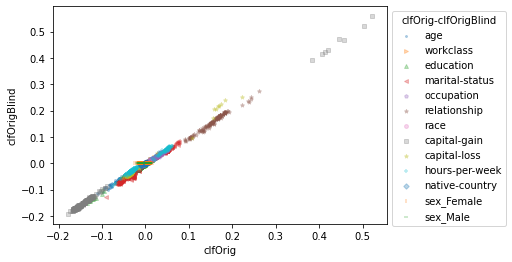

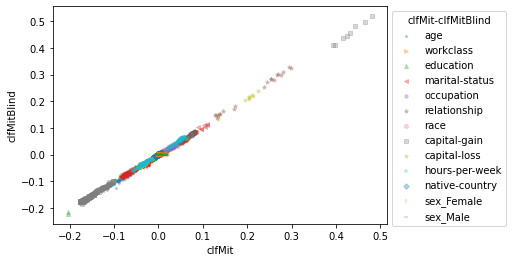

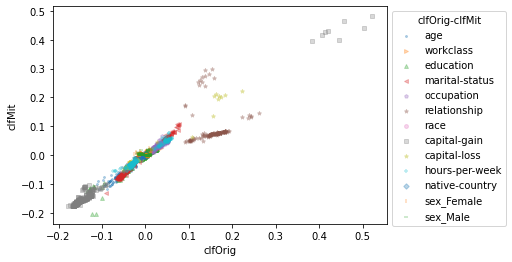

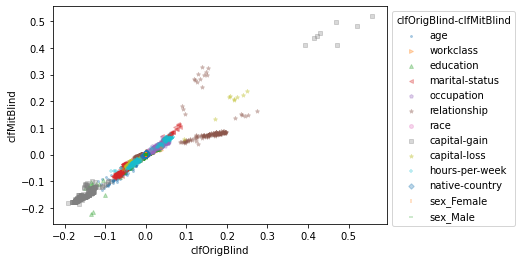

In [102]:
XAIPlots(shap_v,column_names,diffClfs=True)

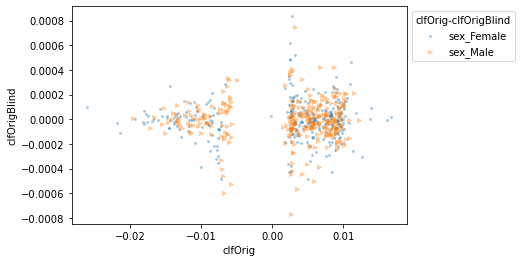

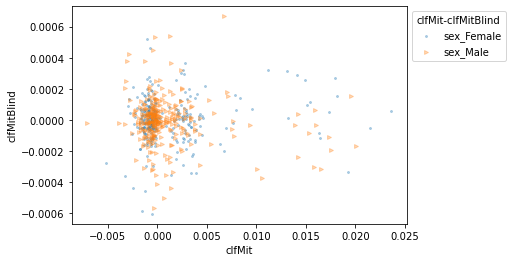

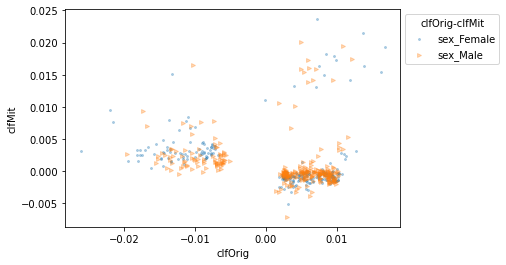

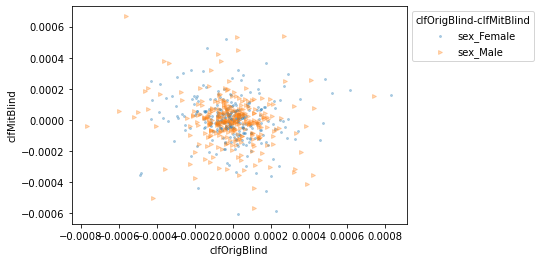

In [103]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [104]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [105]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [106]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [107]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.331051           -1.381389       -1.266705   
workclass                  -0.004994           -0.145475       -0.084289   
education                   1.058156            0.276001        0.691545   
marital-status              4.255429            1.110925        2.350906   
occupation                  0.179296            0.218402        0.238487   
relationship               -5.544114           -7.454491       -7.099368   
race                        0.066242            0.013738        0.038542   
capital-gain               -6.996381           -7.707141       -7.125587   
capital-loss               -0.026873            0.396224        0.229650   
hours-per-week             -0.394326           -0.137912       -0.212427   
native-country             -0.011662           -0.049968       -0.038576   
sex_Female                  0.928139           -0.077647        0.850492   
sex_Male                    0.603899            0.019606        0.623505   

                clfOrigBlind-clfMitBlind  
age                            -1.445734  
workclass                      -0.066181  
education                       0.642612  
marital-status                  3.015448  
occupation                      0.159211  
relationship                   -5.899238  
race                            0.041438  
capital-gain                   -7.577935  
capital-loss                    0.139700  
hours-per-week                 -0.319812  
native-country                 -0.023053  
sex_Female                      0.000000  
sex_Male                        0.000000

In [108]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002915            0.002866        0.005380   
workclass                   0.000703            0.000750        0.001643   
education                   0.002825            0.001490        0.004180   
marital-status              0.006476            0.002877        0.014366   
occupation                  0.001765            0.001224        0.002906   
relationship                0.008981            0.003196        0.054362   
race                        0.000184            0.000456        0.000456   
capital-gain                0.001848            0.002201        0.003271   
capital-loss                0.002151            0.000776        0.001565   
hours-per-week              0.002730            0.002627        0.004998   
native-country              0.000344            0.000234        0.000390   
sex_Female                  0.011950            0.001798        0.013424   
sex_Male                    0.008581            0.001855        0.010219   

                clfOrigBlind-clfMitBlind  
age                             0.006352  
workclass                       0.001572  
education                       0.004558  
marital-status                  0.010586  
occupation                      0.003269  
relationship                    0.060204  
race                            0.000549  
capital-gain                    0.003401  
capital-loss                    0.001301  
hours-per-week                  0.003825  
native-country                  0.000246  
sex_Female                      0.000000  
sex_Male                        0.000000

In [109]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.766019            0.048627        0.736998   
SA-Mean               0.010266            0.001826        0.011821   
NSA-Sum               1.806229            1.717424        1.761462   
NSA-Mean              0.002811            0.001700        0.008501   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   1.757306  
NSA-Mean                  0.008715

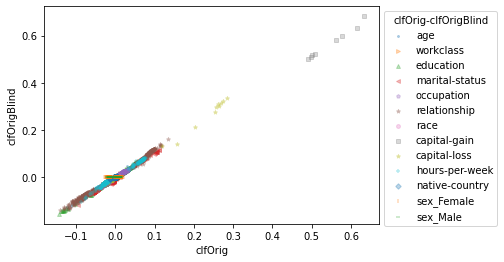

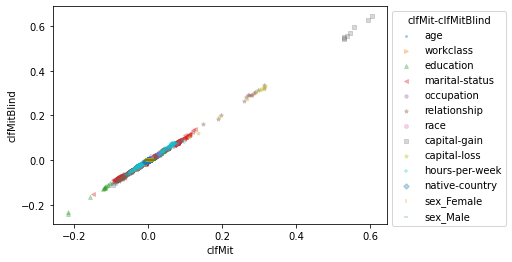

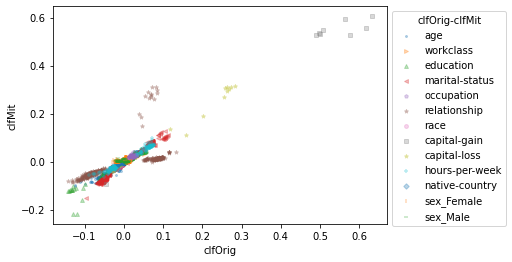

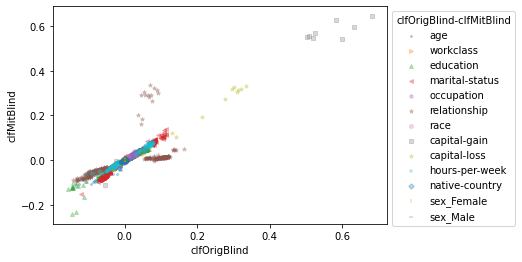

In [110]:
XAIPlots(shap_v,column_names,diffClfs=True)

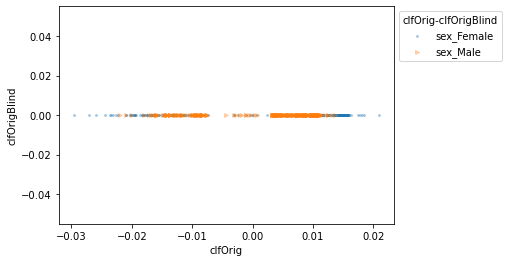

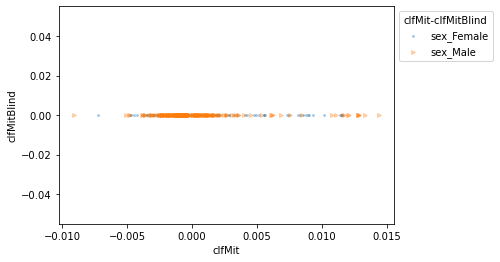

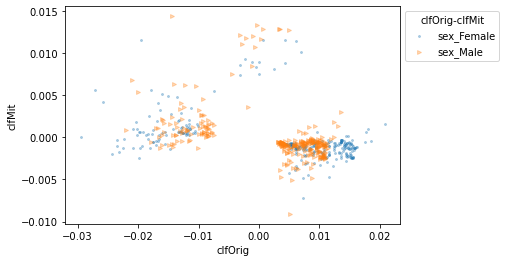

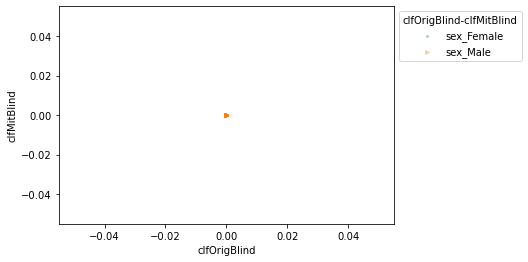

In [111]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [112]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [113]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [114]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [115]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -8.878978           -8.159031       -8.216937   
workclass                  -0.229114           -0.294223       -0.289071   
education                  -3.826160           -4.023493       -4.719158   
marital-status              2.701398            0.851490        0.998566   
occupation                  3.161594            2.882958        3.081998   
relationship                7.527676            7.077544        6.037318   
race                       -0.145733            0.236498        0.214255   
capital-gain             -119.001469         -116.569862     -114.555836   
capital-loss              -26.416512          -26.326393      -29.265563   
hours-per-week             -8.426857           -9.557763       -9.381911   
native-country              1.293959            1.041113        1.368746   
sex_Female                 -0.628206            0.383894       -0.322484   
sex_Male                    0.082068            0.140786        0.024750   

                clfOrigBlind-clfMitBlind  
age                            -8.821072  
workclass                      -0.234267  
education                      -3.130495  
marital-status                  2.554322  
occupation                      2.962555  
relationship                    8.567903  
race                           -0.123491  
capital-gain                 -121.015495  
capital-loss                  -23.477343  
hours-per-week                 -8.602709  
native-country                  0.966326  
sex_Female                      0.078173  
sex_Male                        0.198103

In [116]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.011958            0.011756        0.010778   
workclass                   0.010575            0.009771        0.009840   
education                   0.012469            0.014326        0.011455   
marital-status              0.014048            0.010345        0.012355   
occupation                  0.009470            0.009489        0.011037   
relationship                0.015145            0.011070        0.030904   
race                        0.010121            0.010188        0.009322   
capital-gain                0.010774            0.016465        0.009833   
capital-loss                0.021363            0.008988        0.012875   
hours-per-week              0.011176            0.011587        0.010767   
native-country              0.009214            0.008635        0.008977   
sex_Female                  0.013537            0.011212        0.015212   
sex_Male                    0.013049            0.010207        0.014716   

                clfOrigBlind-clfMitBlind  
age                             0.012883  
workclass                       0.010990  
education                       0.011893  
marital-status                  0.011547  
occupation                      0.010675  
relationship                    0.041221  
race                            0.010418  
capital-gain                    0.006946  
capital-loss                    0.013453  
hours-per-week                  0.012854  
native-country                  0.009624  
sex_Female                      0.010508  
sex_Male                        0.010491

In [117]:
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.355137            0.262340        0.173617   
SA-Mean               0.013293            0.010710        0.014964   
NSA-Sum              16.509950           16.092761       16.193578   
NSA-Mean              0.012392            0.011147        0.012559   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.138138  
SA-Mean                   0.010499  
NSA-Sum                  16.405089  
NSA-Mean                  0.013864

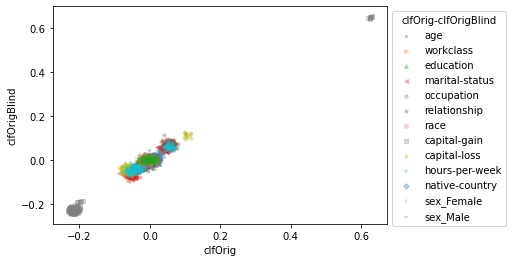

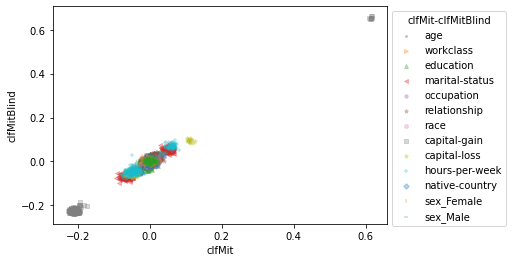

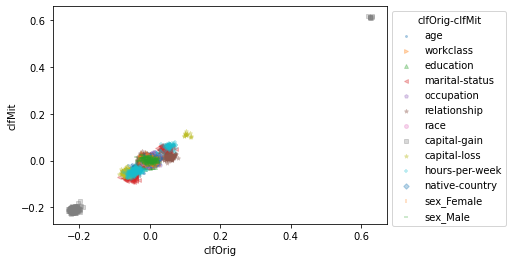

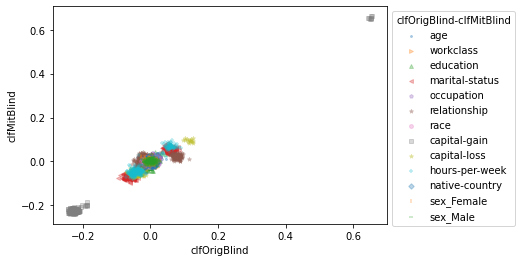

In [118]:
XAIPlots(lime_v,column_names,diffClfs=True)

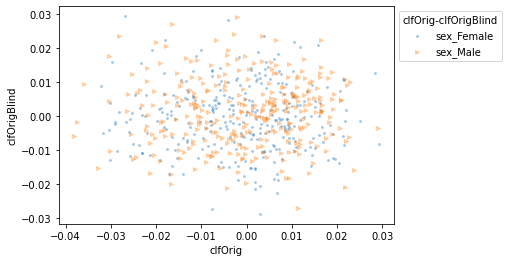

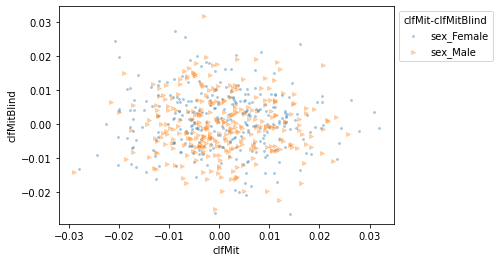

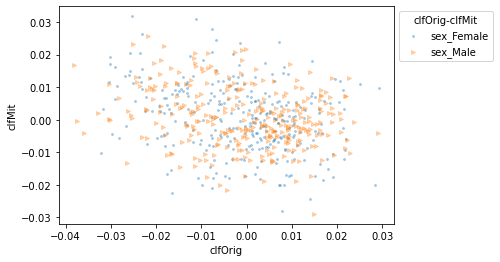

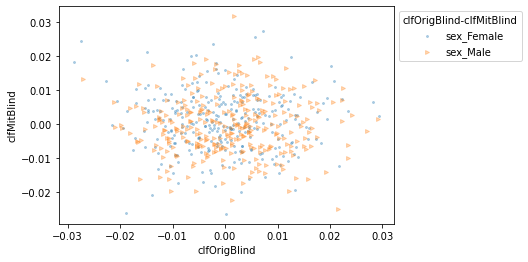

In [119]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [120]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [121]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [122]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                  -11.144141     -12.703002                 -11.170347   
workclass              0.398841       0.184865                   0.269161   
education             -6.532081      -7.818516                  -6.327044   
marital-status        -3.024733      -4.881428                  -6.356054   
occupation             9.229214      10.308008                   9.696296   
relationship          34.505550      21.591920                  36.426762   
race                  -0.060832       0.040412                  -0.044215   
capital-gain         -80.141016     -84.006023                 -84.618392   
capital-loss         -18.652091     -15.348768                 -16.435836   
hours-per-week        -5.444942      -5.492202                  -4.607940   
native-country         0.168958       0.148282                   0.246952   
sex_Female             0.711632       0.771090                  -0.002714   
sex_Male               0.927143       0.579060                  -0.002153   

                clfMitBlind-clfMitBlind  
age                          -14.069291  
workclass                      0.109081  
education                     -7.700915  
marital-status                -4.988721  
occupation                    10.254149  
relationship                  22.993106  
race                           0.087698  
capital-gain                 -86.552797  
capital-loss                 -15.593767  
hours-per-week                -5.557537  
native-country                 0.382841  
sex_Female                     0.000430  
sex_Male                      -0.004543

In [123]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001034       0.000815                   0.001523   
workclass              0.000168       0.000357                   0.000178   
education              0.001861       0.001083                   0.001858   
marital-status         0.004226       0.001175                   0.005743   
occupation             0.001081       0.000437                   0.000358   
relationship           0.002807       0.002128                   0.004436   
race                   0.000183       0.000189                   0.000161   
capital-gain           0.003579       0.000826                   0.002855   
capital-loss           0.003476       0.004631                   0.006758   
hours-per-week         0.001529       0.001192                   0.001828   
native-country         0.000168       0.000149                   0.000164   
sex_Female             0.000537       0.000299                   0.000155   
sex_Male               0.000821       0.000179                   0.000157   

                clfMitBlind-clfMitBlind  
age                            0.000634  
workclass                      0.000206  
education                      0.001179  
marital-status                 0.002506  
occupation                     0.001914  
relationship                   0.002028  
race                           0.000233  
capital-gain                   0.006304  
capital-loss                   0.006422  
hours-per-week                 0.001279  
native-country                 0.000167  
sex_Female                     0.000143  
sex_Male                       0.000151

In [124]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.819388       0.675075                   0.002433   
SA-Mean          0.000679       0.000239                   0.000156   
NSA-Sum         15.391127      14.774857                  16.018091   
NSA-Mean         0.001828       0.001180                   0.002351   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.002486  
SA-Mean                  0.000147  
NSA-Sum                 15.299082  
NSA-Mean                 0.002079

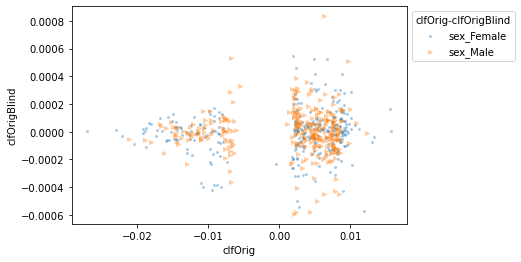

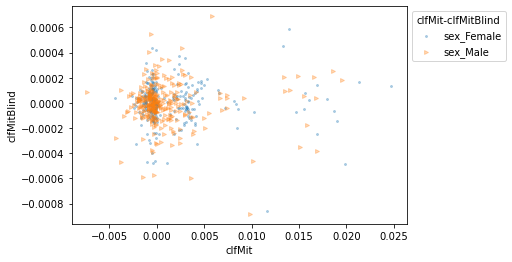

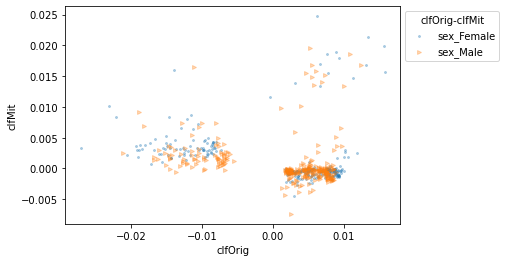

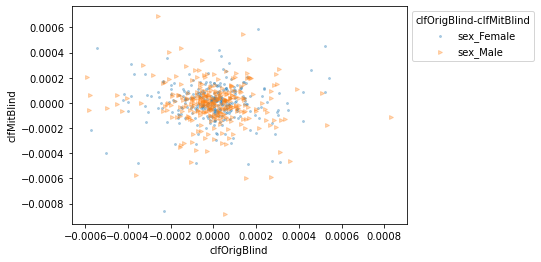

In [125]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [126]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [127]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [128]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -1.207368      -1.326043                  -1.454734   
workclass             -0.013210      -0.155368                   0.003221   
education              1.045699       0.337391                   1.070613   
marital-status         4.141455       0.560357                   4.369403   
occupation             0.259092       0.217881                   0.099500   
relationship          -7.167856      -7.030879                  -3.920372   
race                   0.065567       0.011516                   0.066917   
capital-gain          -6.793480      -7.457694                  -7.199281   
capital-loss          -0.011596       0.470897                  -0.042150   
hours-per-week        -0.334475      -0.090379                  -0.454178   
native-country        -0.020780      -0.056373                  -0.002543   
sex_Female             1.856277      -0.155294                   0.000000   
sex_Male               1.207799       0.039212                   0.000000   

                clfMitBlind-clfMitBlind  
age                           -1.436735  
workclass                     -0.135582  
education                      0.214610  
marital-status                 1.661494  
occupation                     0.218922  
relationship                  -7.878104  
race                           0.015959  
capital-gain                  -7.956588  
capital-loss                   0.321550  
hours-per-week                -0.185446  
native-country                -0.043563  
sex_Female                     0.000000  
sex_Male                       0.000000

In [129]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                         0.0            0.0                        0.0   
workclass                   0.0            0.0                        0.0   
education                   0.0            0.0                        0.0   
marital-status              0.0            0.0                        0.0   
occupation                  0.0            0.0                        0.0   
relationship                0.0            0.0                        0.0   
race                        0.0            0.0                        0.0   
capital-gain                0.0            0.0                        0.0   
capital-loss                0.0            0.0                        0.0   
hours-per-week              0.0            0.0                        0.0   
native-country              0.0            0.0                        0.0   
sex_Female                  0.0            0.0                        0.0   
sex_Male                    0.0            0.0                        0.0   

                clfMitBlind-clfMitBlind  
age                                 0.0  
workclass                           0.0  
education                           0.0  
marital-status                      0.0  
occupation                          0.0  
relationship                        0.0  
race                                0.0  
capital-gain                        0.0  
capital-loss                        0.0  
hours-per-week                      0.0  
native-country                      0.0  
sex_Female                          0.0  
sex_Male                            0.0

In [130]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           1.532038       0.097253                   0.000000   
SA-Mean          0.000000       0.000000                   0.000000   
NSA-Sum          1.914598       1.610434                   1.698447   
NSA-Mean         0.000000       0.000000                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  1.824414  
NSA-Mean                 0.000000

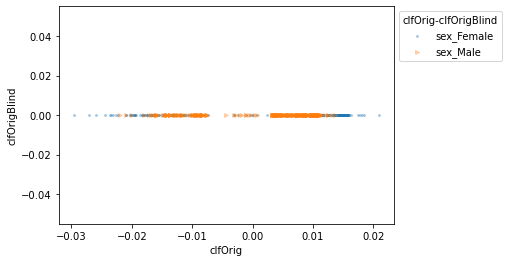

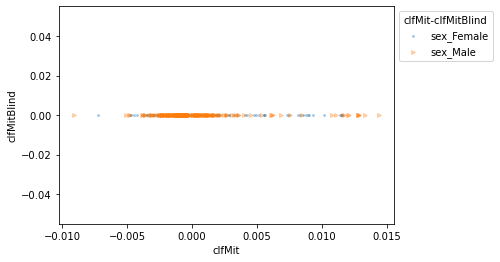

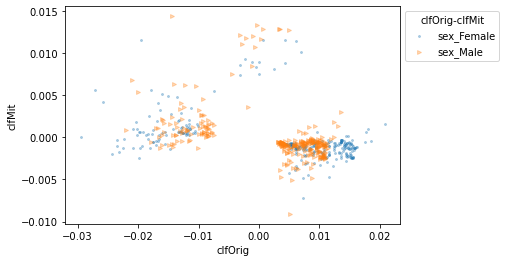

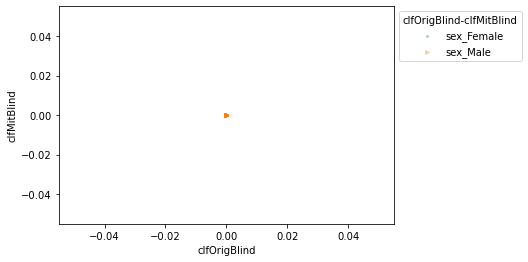

In [131]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [132]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [133]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [134]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -9.078194      -7.674317                  -8.633589   
workclass             -0.592882      -0.023128                   0.105851   
education             -5.028313      -2.944492                  -2.623345   
marital-status         1.643412       0.979691                   3.800238   
occupation             3.255393       3.742273                   3.050735   
relationship           6.147284       5.366398                   8.882709   
race                  -0.073265       0.454153                  -0.261489   
capital-gain        -115.847792    -112.506350                -121.240551   
capital-loss         -25.149725     -20.807080                 -20.390347   
hours-per-week        -8.641606     -10.530922                  -8.216261   
native-country         1.378457       1.298965                   1.220653   
sex_Female            -0.917600       0.175184                  -0.310147   
sex_Male              -0.404143       0.520447                   0.605479   

                clfMitBlind-clfMitBlind  
age                           -8.891639  
workclass                     -0.535403  
education                     -3.146000  
marital-status                 1.492271  
occupation                     3.122390  
relationship                   6.119439  
race                           0.009314  
capital-gain                -121.045942  
capital-loss                 -22.215093  
hours-per-week                -9.302489  
native-country                 0.793350  
sex_Female                     0.454908  
sex_Male                      -0.200644

In [135]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.000806       0.004350                   0.000794   
workclass              0.000844       0.001406                   0.000731   
education              0.000848       0.007103                   0.000750   
marital-status         0.000929       0.007535                   0.000756   
occupation             0.000845       0.003945                   0.000837   
relationship           0.000938       0.017599                   0.000765   
race                   0.000828       0.001521                   0.000788   
capital-gain           0.003030       0.001556                   0.000785   
capital-loss           0.024933       0.019302                   0.002063   
hours-per-week         0.000854       0.003408                   0.000728   
native-country         0.000874       0.001398                   0.000665   
sex_Female             0.000834       0.001966                   0.000751   
sex_Male               0.000803       0.001837                   0.000773   

                clfMitBlind-clfMitBlind  
age                            0.006553  
workclass                      0.001340  
education                      0.003806  
marital-status                 0.004117  
occupation                     0.003054  
relationship                   0.014482  
race                           0.001348  
capital-gain                   0.001654  
capital-loss                   0.015780  
hours-per-week                 0.001853  
native-country                 0.001123  
sex_Female                     0.001566  
sex_Male                       0.001857

In [136]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.660872       0.347816                   0.457813   
SA-Mean          0.000818       0.001901                   0.000762   
NSA-Sum         16.076029      15.120706                  16.220524   
NSA-Mean         0.003248       0.006284                   0.000878   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.327776  
SA-Mean                  0.001711  
NSA-Sum                 16.061212  
NSA-Mean                 0.005010

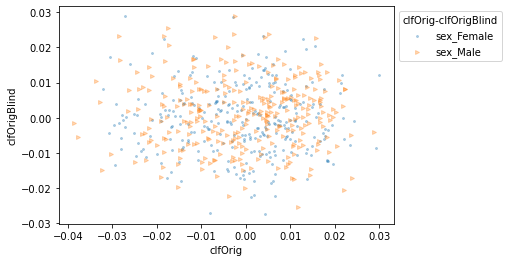

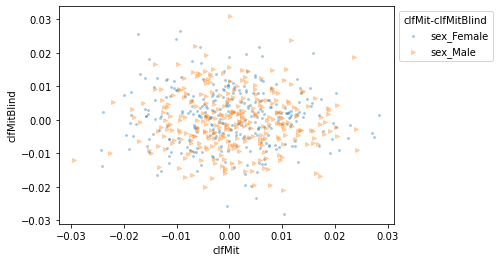

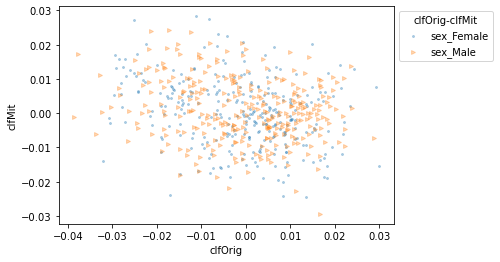

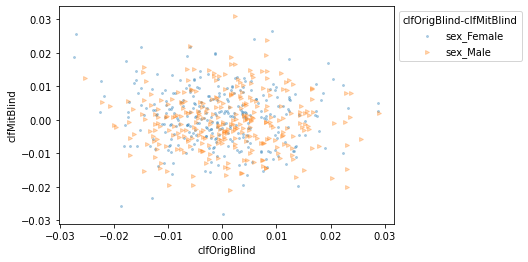

In [137]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [11]:
path_res = '/Users/Marta/FAccT/Res-ADULT/'
path_data = 'datasets/'
filename = 'adult.csv'
sensitive = ['sex'] #OR 'race','marital-status'
df = prepare_adult_dataset(filename, path_data, sensitive)
df

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


target  age  workclass  education  marital-status  occupation  \
0           0   39          6          9               4           0   
1           0   50          5          9               2           3   
2           0   38          3         11               0           5   
3           0   53          3          1               2           5   
4           0   28          3          9               2           9   
...       ...  ...        ...        ...             ...         ...   
32556       0   27          3          7               2          12   
32557       1   40          3         11               2           6   
32558       0   58          3         11               6           0   
32559       0   22          3         11               4           0   
32560       1   52          4         11               2           3   

       relationship  race  capital-gain  capital-loss  hours-per-week  \
0                 1     4          2174             0              40   
1                 0     4             0             0              13   
2                 1     4             0             0              40   
3                 0     2             0             0              40   
4                 5     2             0             0              40   
...             ...   ...           ...           ...             ...   
32556             5     4             0             0              38   
32557             0     4             0             0              40   
32558             4     4             0             0              40   
32559             3     4             0             0              20   
32560             5     4         15024             0              40   

       native-country  sex_Female  sex_Male  
0                  38           0         1  
1                  38           0         1  
2                  38           0         1  
3                  38           0         1  
4                   4           1         0  
...               ...         ...       ...  
32556              38           1         0  
32557              38           0         1  
32558              38           1         0  
32559              38           0         1  
32560              38           1         0  

[32561 rows x 14 columns]

In [12]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['<=50K','>50K']
# dictionary={'<=50K': 0, '>50K': 1}
adClass=1
disClass=0
protected = ['sex_Female','sex_Male']#['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']
protected_feature='sexes'#'races' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr='sex_Male'
disAttr='sex_Female'

In [13]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [14]:
X = X.sample(3000)
X_blind = X_blind.iloc[X.index]
Y = Y[X.index]

X_test = pd.DataFrame(X_test, columns=column_names)
X_test = X_test.sample(300)
y_test = y_test[X_test.index]
X_test = X_test.values

In [15]:

ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=2.310129700083158e-09)
LogisticRegression(C=0.0006951927961775605, penalty='l1', solver='liblinear')
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=500)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Non-Blind Rankers Evaluation
           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.786333                         0.787000   
Precision              0.637989                         0.642465   
Recall                 0.283562                         0.283562   
F1 Score               0.392524                         0.393319   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.796333                        0.790333       0.838000   
Precision             0.758646                        0.833824       0.765601   
Recall                0.239726                        0.172603       0.483562   
F1 Score              0.363726                        0.285167       0.592083   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.839667                   0.765000   
Precision                  0.712955                   

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Blind Rankers Evaluation
           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.784667                               0.783333   
Precision                    0.807703                               0.781784   
Recall                       0.152055                               0.152055   
F1 Score                     0.254980                               0.253894   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.796333                              0.790333   
Precision                   0.758646                              0.833824   
Recall                      0.239726                              0.172603   
F1 Score                    0.363726                              0.285167   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.842333                        0.840333   
Precision    

In [16]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [17]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [18]:
findFreq(target,protected,df)

({'sex_Female': 6721, 'sex_Male': 10592},
 {'sex_Female': 799, 'sex_Male': 4680})

In [19]:
df_new=PreferentialSampling(target,protected,ranker,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'sex_Female': 6721, 'sex_Male': 10592}
Counting labels = 1  {'sex_Female': 799, 'sex_Male': 4680}
DN  ('sex_Female', 6721)
FP  ('sex_Male', 4680)
DP  ('sex_Female', 799)
FN  ('sex_Male', 10592)
Len DN_df  6721
Len FP_df  4680
Len DP_df  799
Len FN_df  10592


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  5712
1009 to be removed
Len DN_df after sampling  5712
FP_expected  3671
1009 to be removed
Len FP_df after sampling  3671
DP_expected  1808
1009 to add
Len DP_df after sampling  1808
FN_expected  11601
1009 to add
Len FN_df after sampling  11601


In [20]:
findFreq(target,protected,df_new)

({'sex_Female': 5712, 'sex_Male': 11601},
 {'sex_Female': 1808, 'sex_Male': 3671})

In [21]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [22]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [23]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 38 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 5 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 49 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 20 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 44 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 4 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 57 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 17 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.756667            0.750000       0.760000   
Precision           0.552358            0.531474       0.582424   
Recall              0.643382            0.496324       0.520588   
F1 Score            0.587092            0.505892       0.527168   
Discrimination      0.137098            0.177005       0.038493   

                CLF Mitigated Blind     Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.716667  CLF Mitigated    0.006667    0.043333   
Precision                  0.478571  CLF Mitigated    0.020884    0.103853   
Recall                     0.456618   CLF Original    0.147059    0.063971   
F1 Score                   0.462947   CLF Original    0.081201    0.064221   
Discrimination             0.108709  CLF Mitigated    0.039907    0.070216   

                Delta O-M  Delta OB-MB  
Accuracy         0.003333     0.033333  
Precision        0.030066     0.052903  
Recall           0.122794     0.039706  
F1 Score         0.059924     0.042945  
Discrimination   0.098606     0.068297

In [24]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [25]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [26]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.756667            0.750000       0.760000   
Precision           0.552358            0.531474       0.582424   
Recall              0.643382            0.496324       0.520588   
F1 Score            0.587092            0.505892       0.527168   
Discrimination      0.137098            0.177005       0.038493   

                CLF Mitigated Blind     Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.716667  CLF Mitigated    0.006667    0.043333   
Precision                  0.478571  CLF Mitigated    0.020884    0.103853   
Recall                     0.456618   CLF Original    0.147059    0.063971   
F1 Score                   0.462947   CLF Original    0.081201    0.064221   
Discrimination             0.108709  CLF Mitigated    0.039907    0.070216   

                Delta O-M  Delta OB-MB  
Accuracy         0.003333     0.033333  
Precision        0.030066     0.052903  
Recall           0.122794     0.039706  
F1 Score         0.059924     0.042945  
Discrimination   0.098606     0.068297

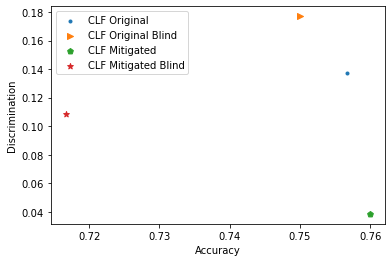

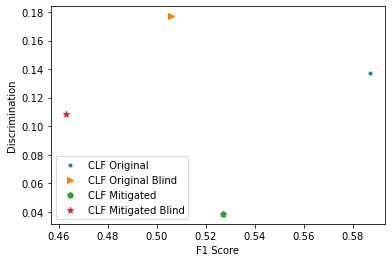

In [27]:
plotDisc(res)

In [28]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 98 instances.
    * "('sex_Male',)" grouping has 202 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 90 data points.
        - The class *>50K* has 8 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 129 data points.
        - The class *>50K* has 73 data points.


In [29]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Pa

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': ["'sex_Female' 'sex_Male' "],
  'Delta OB-MB': ["'sex_Female' 'sex_Male' "]},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

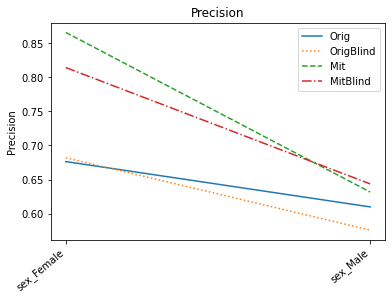

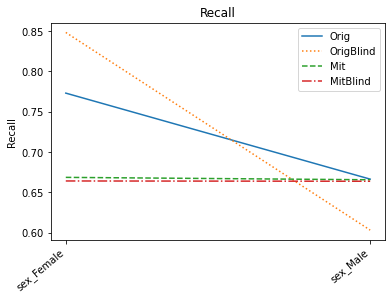

In [30]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [31]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [32]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [33]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [34]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -6.905526           -7.422916       -6.082250   
workclass                   0.412537            0.979384        0.561513   
education                  -8.194839           -8.258191       -6.401362   
marital-status            -14.262841          -12.463560       -9.657935   
occupation                 -2.235053            8.363282        9.288233   
relationship                8.430438           10.534844       12.737507   
race                       -0.020102           -0.002269        0.124727   
capital-gain             -118.270934          -98.229926     -113.545548   
capital-loss              -23.828423          -28.501061      -32.270231   
hours-per-week              0.343451            0.726096        0.339306   
native-country             -2.081117           -1.497354       -1.019903   
sex_Female                  1.023554            0.223137        1.231780   
sex_Male                    0.133493            0.454488        0.606762   

                clfOrigBlind-clfMitBlind  
age                            -8.246192  
workclass                       0.830408  
education                     -10.051669  
marital-status                -17.068466  
occupation                     -3.160004  
relationship                    6.227775  
race                           -0.147098  
capital-gain                 -102.955311  
capital-loss                  -20.059253  
hours-per-week                  0.730240  
native-country                 -2.558568  
sex_Female                      0.014911  
sex_Male                       -0.018782

In [35]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.013290            0.020245        0.019018   
workclass                   0.002999            0.005553        0.005440   
education                   0.009249            0.019467        0.013785   
marital-status              0.023893            0.024240        0.034985   
occupation                  0.005854            0.044862        0.041514   
relationship                0.016914            0.019530        0.026737   
race                        0.001841            0.003211        0.002562   
capital-gain                0.049229            0.048817        0.069500   
capital-loss                0.020535            0.039437        0.031978   
hours-per-week              0.008859            0.018439        0.014436   
native-country              0.008488            0.008455        0.008430   
sex_Female                  0.009012            0.021394        0.030423   
sex_Male                    0.003316            0.027424        0.030722   

                clfOrigBlind-clfMitBlind  
age                             0.016112  
workclass                       0.004609  
education                       0.016081  
marital-status                  0.024613  
occupation                      0.010582  
relationship                    0.031574  
race                            0.004226  
capital-gain                    0.031797  
capital-loss                    0.020416  
hours-per-week                  0.010759  
native-country                  0.009695  
sex_Female                      0.000783  
sex_Male                        0.000713

In [36]:
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.578523            0.338813        0.919271   
SA-Mean               0.006164            0.024409        0.030573   
NSA-Sum              16.816842           16.088989       17.457138   
NSA-Mean              0.014650            0.022932        0.024399   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.016846  
SA-Mean                   0.000748  
NSA-Sum                  15.639544  
NSA-Mean                  0.016406

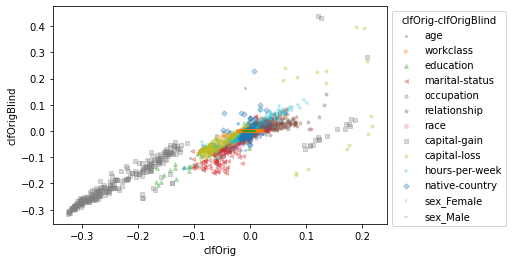

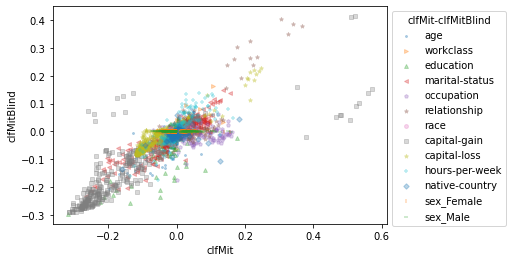

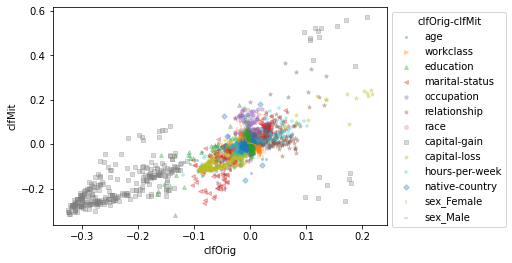

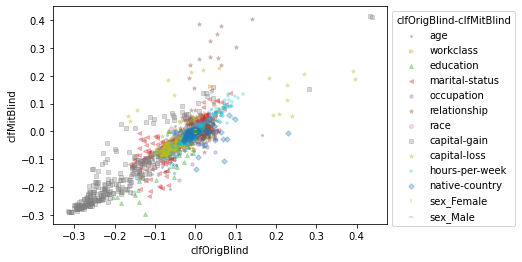

In [37]:
XAIPlots(shap_v,column_names,diffClfs=True)

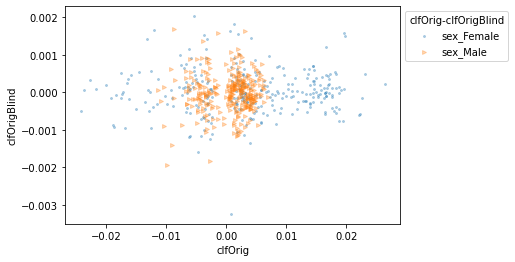

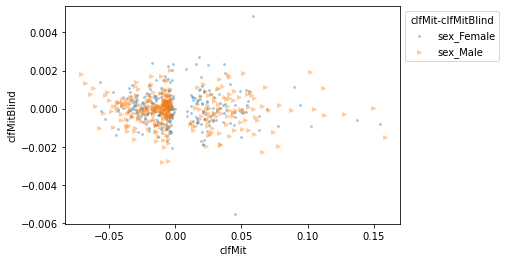

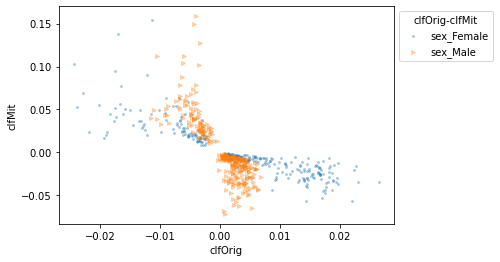

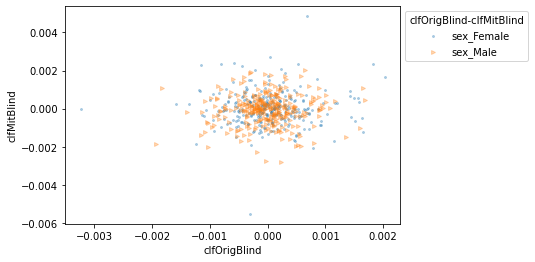

In [38]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [39]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [40]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [41]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [42]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -2.739900           -1.833586       -2.019552   
workclass                   0.106047            0.299853        0.166548   
education                  -1.707756           -1.601628       -0.900837   
marital-status             -4.449279            5.253190        2.599922   
occupation                 -0.363095            1.682633        1.915304   
relationship                1.460219            2.414148        2.032687   
race                        0.008914            0.200128        0.406164   
capital-gain             -149.557457         -110.132294     -117.866101   
capital-loss              -26.047214          -16.631858      -23.839733   
hours-per-week             -0.331508           -0.948497       -0.700191   
native-country             -3.421102           -1.640438       -1.139529   
sex_Female                  0.320368           -0.457457       -0.045079   
sex_Male                    0.546301           -0.417777       -0.162536   

                clfOrigBlind-clfMitBlind  
age                            -2.553934  
workclass                       0.239352  
education                      -2.408546  
marital-status                 -1.796011  
occupation                     -0.595766  
relationship                    1.841679  
race                           -0.197122  
capital-gain                 -141.823650  
capital-loss                  -18.839339  
hours-per-week                 -0.579814  
native-country                 -3.922011  
sex_Female                     -0.092010  
sex_Male                        0.291060

In [43]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.011341            0.013998        0.011407   
workclass                   0.008677            0.009587        0.010446   
education                   0.008946            0.019379        0.013712   
marital-status              0.011111            0.012371        0.024877   
occupation                  0.008557            0.014420        0.015393   
relationship                0.014541            0.010934        0.014434   
race                        0.008398            0.010663        0.009921   
capital-gain                0.065329            0.054871        0.086087   
capital-loss                0.008667            0.028017        0.010912   
hours-per-week              0.011778            0.016927        0.010840   
native-country              0.011930            0.008094        0.009391   
sex_Female                  0.009009            0.012541        0.015584   
sex_Male                    0.008339            0.014997        0.017313   

                clfOrigBlind-clfMitBlind  
age                             0.013609  
workclass                       0.008362  
education                       0.013124  
marital-status                  0.020086  
occupation                      0.007891  
relationship                    0.020816  
race                            0.008300  
capital-gain                    0.099311  
capital-loss                    0.037444  
hours-per-week                  0.011650  
native-country                  0.010606  
sex_Female                      0.008727  
sex_Male                        0.007911

In [44]:
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.433334            0.437617        0.103808   
SA-Mean               0.008674            0.013769        0.016449   
NSA-Sum              17.290226           12.967114       13.962415   
NSA-Mean              0.015389            0.018115        0.019765   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.191535  
SA-Mean                   0.008319  
NSA-Sum                  15.890657  
NSA-Mean                  0.022836

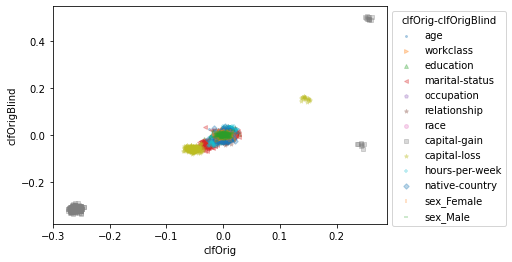

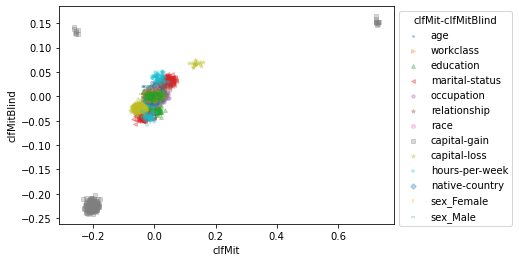

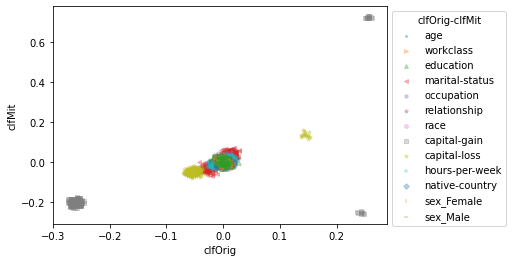

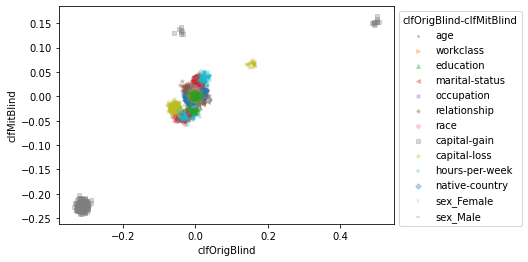

In [45]:
XAIPlots(lime_v,column_names,diffClfs=True)

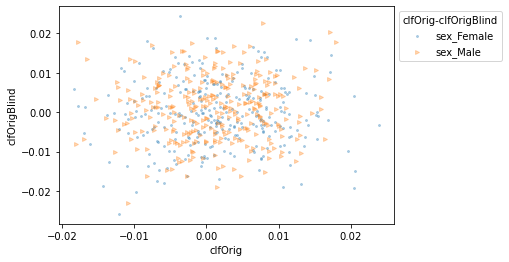

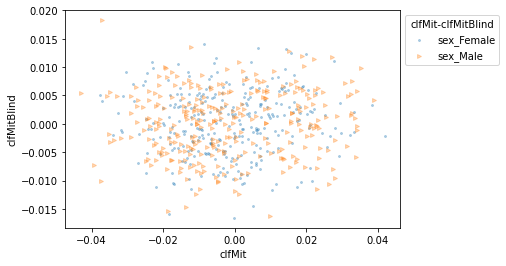

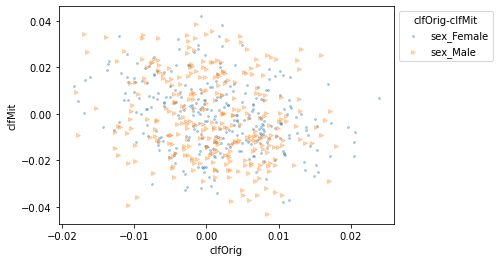

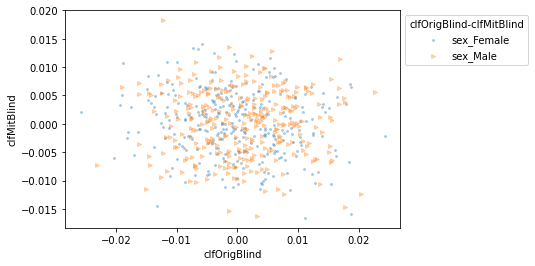

In [46]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [47]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [48]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [49]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [50]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -7.263073           -5.894686       -4.880460   
workclass                   0.429554            0.933054        0.506033   
education                  -8.655701           -7.833539       -6.296138   
marital-status            -14.284905           -8.176001       -7.003271   
occupation                 -2.095601            8.712907        9.664278   
relationship                8.550247           11.715564       13.373241   
race                        0.009259           -0.026623        0.123231   
capital-gain             -115.564926          -97.499163     -109.856633   
capital-loss              -28.859544          -28.788108      -34.931071   
hours-per-week              1.003749            1.378561        1.572798   
native-country             -2.074135           -1.300061       -0.880844   
sex_Female                  1.025014            0.136358        1.166344   
sex_Male                    0.131940            0.407147        0.559775   

                clfOrigBlind-clfMitBlind  
age                            -8.277299  
workclass                       0.856576  
education                     -10.193101  
marital-status                -15.457635  
occupation                     -3.046971  
relationship                    6.892570  
race                           -0.140595  
capital-gain                 -103.207456  
capital-loss                  -22.716582  
hours-per-week                  0.809512  
native-country                 -2.493353  
sex_Female                     -0.004972  
sex_Male                       -0.020687

In [51]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.014092            0.020861        0.019726   
workclass                   0.003014            0.005929        0.005436   
education                   0.009380            0.019113        0.013728   
marital-status              0.025213            0.024553        0.035063   
occupation                  0.005972            0.045393        0.042078   
relationship                0.016878            0.018703        0.025527   
race                        0.001909            0.003207        0.002548   
capital-gain                0.043266            0.047515        0.066571   
capital-loss                0.020519            0.039014        0.026247   
hours-per-week              0.009795            0.018767        0.014398   
native-country              0.008114            0.008638        0.008466   
sex_Female                  0.008933            0.021026        0.029967   
sex_Male                    0.003245            0.027023        0.030212   

                clfOrigBlind-clfMitBlind  
age                             0.015870  
workclass                       0.004660  
education                       0.015330  
marital-status                  0.027914  
occupation                      0.010516  
relationship                    0.029890  
race                            0.004289  
capital-gain                    0.030686  
capital-loss                    0.022812  
hours-per-week                  0.009990  
native-country                  0.009532  
sex_Female                      0.000734  
sex_Male                        0.000713

In [52]:
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.578477            0.271753        0.863059   
SA-Mean               0.006089            0.024025        0.030090   
NSA-Sum              17.162790           15.659843       17.189818   
NSA-Mean              0.014377            0.022881        0.023617   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.012830  
SA-Mean                   0.000723  
NSA-Sum                  15.826514  
NSA-Mean                  0.016499

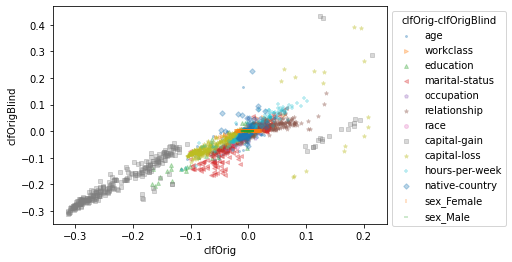

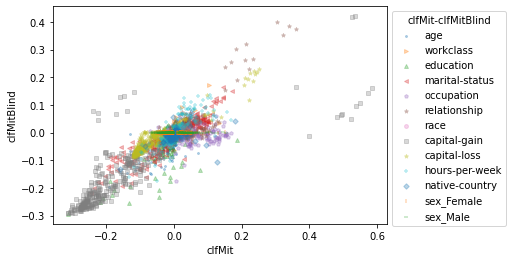

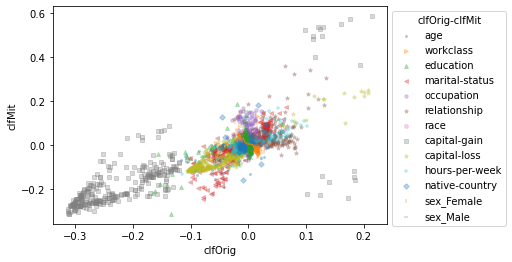

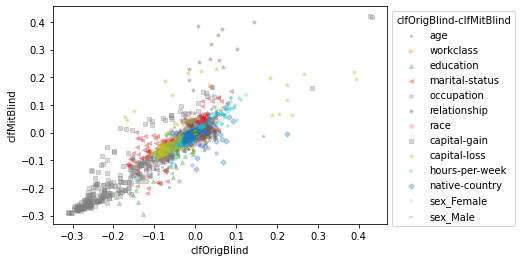

In [53]:
XAIPlots(shap_v,column_names,diffClfs=True)

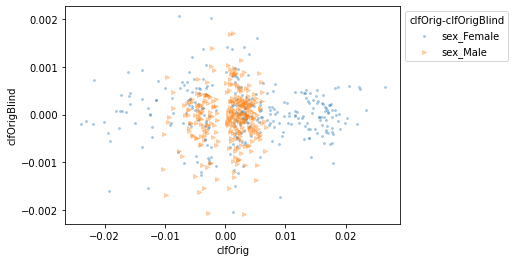

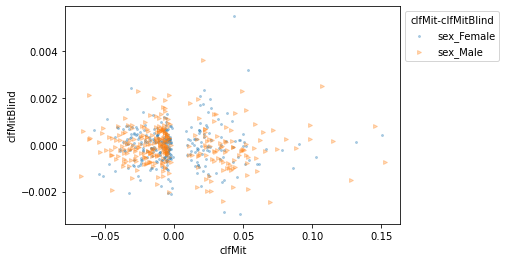

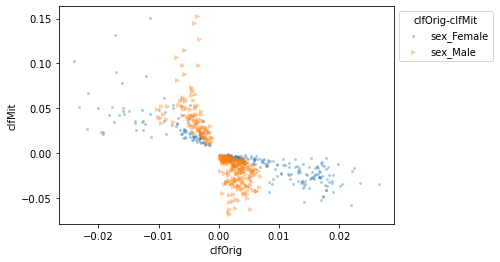

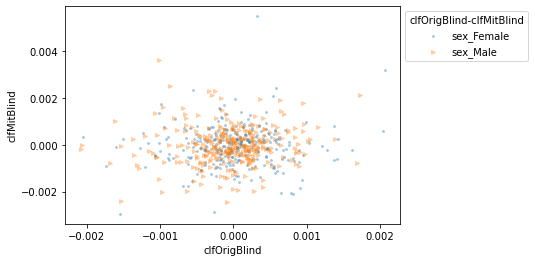

In [54]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [55]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [56]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [57]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [58]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -2.624338           -2.229789       -1.744293   
workclass                   0.056882            0.411236        0.214012   
education                  -1.690113           -1.556533       -0.720424   
marital-status             -4.439269            3.607059        2.321781   
occupation                 -0.395649            0.683951        1.050085   
relationship                1.443144            2.501345        2.085594   
race                       -0.004872            0.097112        0.350573   
capital-gain             -147.820298         -133.792424     -130.879920   
capital-loss              -25.990788          -18.061204      -23.227640   
hours-per-week             -0.364407           -1.113744       -0.374796   
native-country             -3.386651           -2.034661       -1.485997   
sex_Female                  0.318676           -0.624256       -0.225251   
sex_Male                    0.551833           -0.760620       -0.491293   

                clfOrigBlind-clfMitBlind  
age                            -3.109834  
workclass                       0.254106  
education                      -2.526222  
marital-status                 -3.153991  
occupation                     -0.761782  
relationship                    1.858895  
race                           -0.258332  
capital-gain                 -150.732802  
capital-loss                  -20.824353  
hours-per-week                 -1.103355  
native-country                 -3.935316  
sex_Female                     -0.080329  
sex_Male                        0.282506

In [59]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.011632            0.012851        0.011713   
workclass                   0.008657            0.009933        0.010356   
education                   0.008994            0.018131        0.012201   
marital-status              0.011384            0.016833        0.025916   
occupation                  0.008655            0.014218        0.015640   
relationship                0.014761            0.010487        0.011525   
race                        0.008526            0.010276        0.009500   
capital-gain                0.068742            0.042790        0.040262   
capital-loss                0.011101            0.018603        0.010567   
hours-per-week              0.012575            0.013537        0.013977   
native-country              0.012068            0.008372        0.009405   
sex_Female                  0.008831            0.014235        0.017309   
sex_Male                    0.008257            0.018182        0.020060   

                clfOrigBlind-clfMitBlind  
age                             0.011264  
workclass                       0.008337  
education                       0.013809  
marital-status                  0.014624  
occupation                      0.008123  
relationship                    0.016847  
race                            0.008298  
capital-gain                    0.064002  
capital-loss                    0.028133  
hours-per-week                  0.012429  
native-country                  0.010544  
sex_Female                      0.008583  
sex_Male                        0.008073

In [60]:
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.435254            0.692438        0.358272   
SA-Mean               0.008544            0.016208        0.018685   
NSA-Sum              17.110583           15.099005       14.950465   
NSA-Mean              0.016099            0.016003        0.015551   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.181417  
SA-Mean                   0.008328  
NSA-Sum                  17.138090  
NSA-Mean                  0.017856

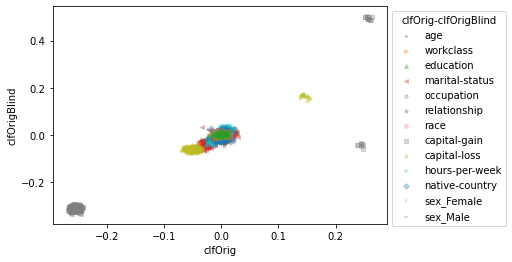

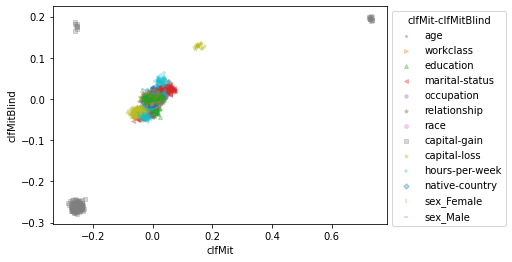

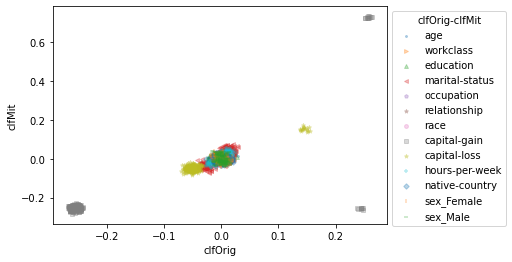

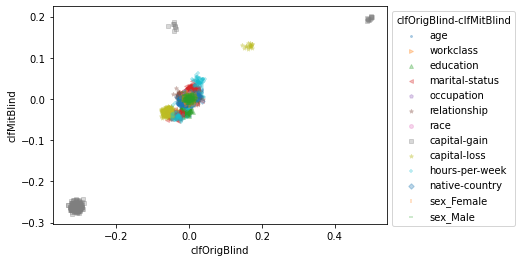

In [61]:
XAIPlots(lime_v,column_names,diffClfs=True)

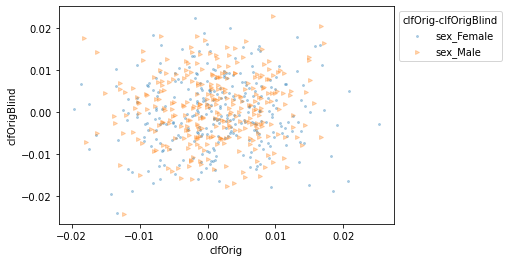

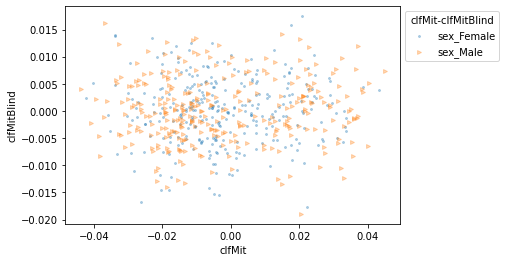

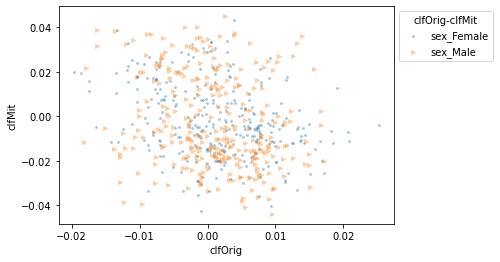

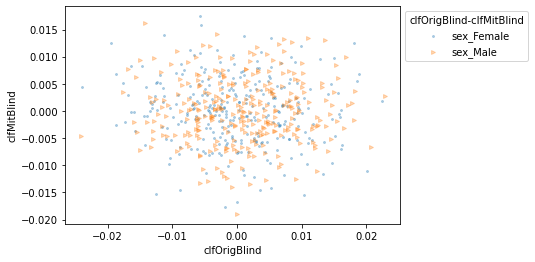

In [62]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [63]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [64]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [65]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -5.905986      -5.056724                  -8.262613   
workclass              0.268779       0.798767                   0.573312   
education             -7.888469      -4.809032                  -8.962071   
marital-status        -7.856805      -8.804401                 -20.690941   
occupation            -1.181798      20.134308                  -3.148856   
relationship          12.366165      13.744583                   4.614519   
race                   0.012096       0.235863                  -0.022938   
capital-gain        -124.585223     -98.816959                -109.250637   
capital-loss         -27.956014     -39.245288                 -24.731953   
hours-per-week         0.253712       1.658392                   1.093488   
native-country        -1.949823       0.049077                  -2.205429   
sex_Female             2.036629       0.361496                   0.011939   
sex_Male               0.283839       0.882698                  -0.018406   

                clfMitBlind-clfMitBlind  
age                           -8.260878  
workclass                      1.113672  
education                    -11.282699  
marital-status               -11.835161  
occupation                    -3.058119  
relationship                   8.505826  
race                          -0.264755  
capital-gain                 -96.912130  
capital-loss                 -18.043881  
hours-per-week                 0.446265  
native-country                -2.846491  
sex_Female                    -0.002000  
sex_Male                      -0.021063

In [66]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001042       0.004553                   0.001088   
workclass              0.000457       0.001331                   0.000660   
education              0.000903       0.001737                   0.001235   
marital-status         0.000967       0.008101                   0.001534   
occupation             0.000447       0.002240                   0.000980   
relationship           0.000559       0.002613                   0.001013   
race                   0.000407       0.001155                   0.000557   
capital-gain           0.008049       0.004399                   0.002138   
capital-loss           0.008796       0.001847                   0.007974   
hours-per-week         0.001043       0.003294                   0.002093   
native-country         0.000493       0.001319                   0.000881   
sex_Female             0.000419       0.001184                   0.000557   
sex_Male               0.000412       0.001336                   0.000548   

                clfMitBlind-clfMitBlind  
age                            0.001837  
workclass                      0.000974  
education                      0.001848  
marital-status                 0.006215  
occupation                     0.000943  
relationship                   0.003005  
race                           0.000900  
capital-gain                   0.002829  
capital-loss                   0.001600  
hours-per-week                 0.001517  
native-country                 0.000868  
sex_Female                     0.000903  
sex_Male                       0.000879

In [67]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           1.160234       0.622097                   0.015172   
SA-Mean          0.000416       0.001260                   0.000553   
NSA-Sum         17.293170      17.577581                  16.686978   
NSA-Mean         0.002106       0.002963                   0.001832   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.011532  
SA-Mean                  0.000891  
NSA-Sum                 14.779080  
NSA-Mean                 0.002049

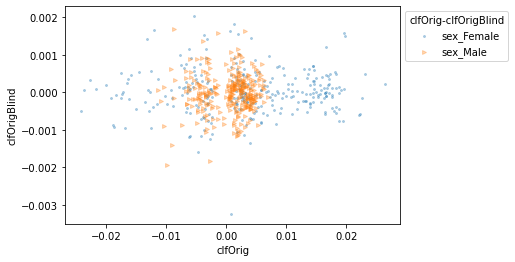

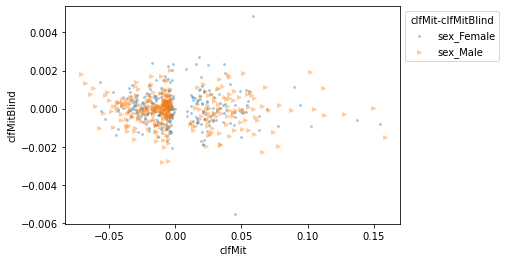

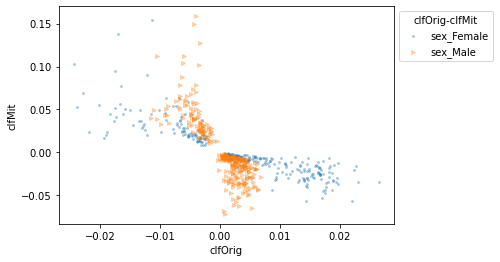

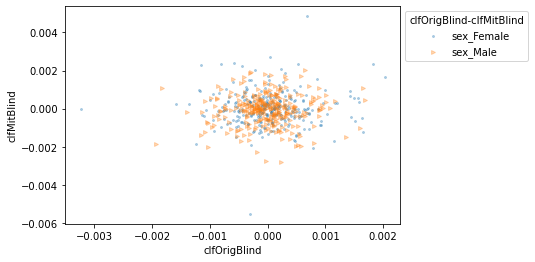

In [68]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [69]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [70]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [71]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -1.827402      -1.936444                  -3.536837   
workclass             -0.033570       0.414130                   0.196499   
education             -1.362788      -0.258473                  -2.035081   
marital-status        -2.525672       7.447375                  -6.362876   
occupation             0.315134       2.650255                  -1.073878   
relationship           1.579547       2.538734                   1.323815   
race                   0.099974       0.656762                  -0.095932   
capital-gain        -134.322767    -114.423255                -163.054989   
capital-loss         -24.452363     -22.615009                 -27.585638   
hours-per-week        -0.041543      -1.033445                  -0.654373   
native-country        -0.852026      -1.773499                  -5.955727   
sex_Female             0.826634      -1.096964                  -0.187590   
sex_Male               0.574687      -1.228516                   0.523447   

                clfMitBlind-clfMitBlind  
age                           -2.126930  
workclass                      0.296959  
education                     -2.899687  
marital-status                 1.412874  
occupation                    -0.283671  
relationship                   2.376759  
race                          -0.359523  
capital-gain                -129.501464  
capital-loss                 -12.078053  
hours-per-week                -1.028795  
native-country                -1.901600  
sex_Female                     0.015250  
sex_Male                       0.050119

In [72]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001074       0.005930                   0.001061   
workclass              0.000938       0.003103                   0.000942   
education              0.000973       0.007679                   0.000995   
marital-status         0.001071       0.005288                   0.000948   
occupation             0.001009       0.005663                   0.000969   
relationship           0.000938       0.005657                   0.000907   
race                   0.000815       0.002949                   0.001005   
capital-gain           0.004676       0.048340                   0.001574   
capital-loss           0.002621       0.006140                   0.003127   
hours-per-week         0.001135       0.007954                   0.001029   
native-country         0.000907       0.003208                   0.000857   
sex_Female             0.000941       0.004178                   0.000982   
sex_Male               0.000856       0.004545                   0.001006   

                clfMitBlind-clfMitBlind  
age                            0.006477  
workclass                      0.003195  
education                      0.004390  
marital-status                 0.007073  
occupation                     0.004025  
relationship                   0.005547  
race                           0.003872  
capital-gain                   0.036442  
capital-loss                   0.012038  
hours-per-week                 0.006480  
native-country                 0.003154  
sex_Female                     0.003482  
sex_Male                       0.003814

In [73]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.700660       1.162740                   0.355518   
SA-Mean          0.000898       0.004362                   0.000994   
NSA-Sum         15.219344      14.158853                  19.261422   
NSA-Mean         0.001469       0.009265                   0.001219   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.032684  
SA-Mean                  0.003648  
NSA-Sum                 14.024210  
NSA-Mean                 0.008427

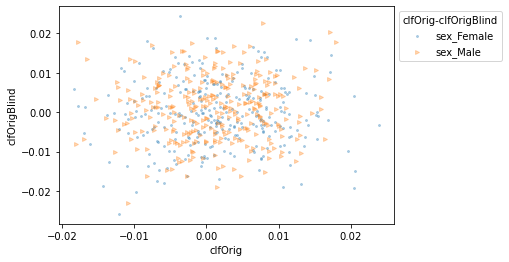

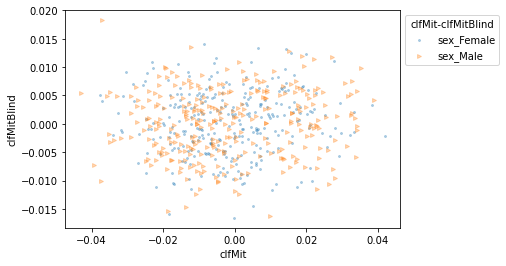

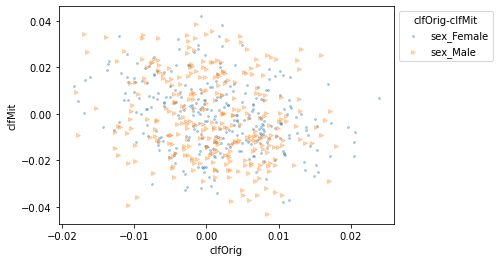

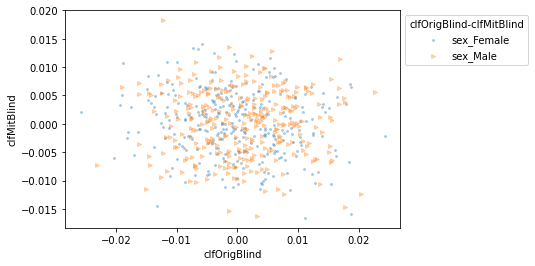

In [74]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [75]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [76]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 44 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 3 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 17 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 12 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 45 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 3 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 202 ] Labeled as + class: [ 17 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 98 ] Labeled as + class: [ 12 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.820000            0.830000       0.830000   
Precision           0.673968            0.701001       0.695763   
Recall              0.628676            0.641912       0.653676   
F1 Score            0.647858            0.667912       0.671996   
Discrimination      0.187210            0.192160      -0.038291   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.826667  CLF Original Blind    0.010000   
Precision                  0.692605  CLF Original Blind    0.027033   
Recall                     0.641912       CLF Mitigated    0.013235   
F1 Score                   0.665320       CLF Mitigated    0.020054   
Discrimination            -0.038291       CLF Mitigated    0.004950   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.003333   0.010000     0.003333  
Precision         0.003158   0.021795     0.008396  
Recall            0.011765   0.025000     0.000000  
F1 Score          0.006676   0.024138     0.002592  
Discrimination    0.000000   0.225500     0.230451

In [77]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [78]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [79]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.820000            0.830000       0.830000   
Precision           0.673968            0.701001       0.695763   
Recall              0.628676            0.641912       0.653676   
F1 Score            0.647858            0.667912       0.671996   
Discrimination      0.187210            0.192160      -0.038291   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.826667  CLF Original Blind    0.010000   
Precision                  0.692605  CLF Original Blind    0.027033   
Recall                     0.641912       CLF Mitigated    0.013235   
F1 Score                   0.665320       CLF Mitigated    0.020054   
Discrimination            -0.038291       CLF Mitigated    0.004950   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.003333   0.010000     0.003333  
Precision         0.003158   0.021795     0.008396  
Recall            0.011765   0.025000     0.000000  
F1 Score          0.006676   0.024138     0.002592  
Discrimination    0.000000   0.225500     0.230451

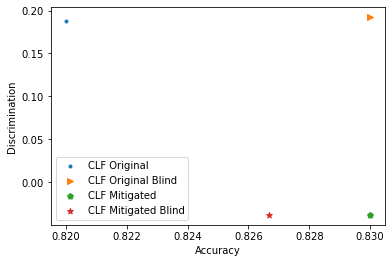

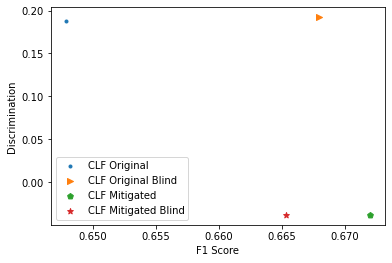

In [80]:
plotDisc(res)

In [81]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 98 instances.
    * "('sex_Male',)" grouping has 202 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 90 data points.
        - The class *>50K* has 8 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 129 data points.
        - The class *>50K* has 73 data points.


In [82]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Pa

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': ["'sex_Female' 'sex_Male' "],
  'Delta OB-MB': ["'sex_Female' 'sex_Male' "]},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

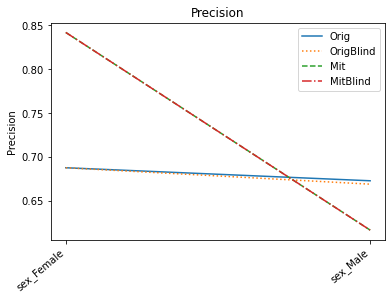

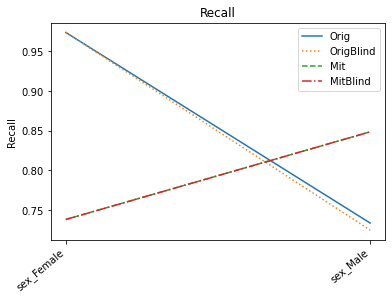

In [83]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [84]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [85]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [86]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [87]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -9.875508          -13.826063      -11.259887   
workclass                   0.460167            0.281099        0.409791   
education                  -7.597457           -8.289990       -8.274549   
marital-status             -1.202722            0.690289        0.522929   
occupation                  8.882284            5.454291        6.613185   
relationship               37.704262           27.613055       31.611010   
race                       -0.166021           -0.184758       -0.153663   
capital-gain              -77.415323          -87.857406      -80.728318   
capital-loss              -18.100662          -14.610256      -17.239586   
hours-per-week             -4.401464           -2.250255       -3.679042   
native-country              0.223149            0.101081        0.089436   
sex_Female                  0.167214            2.340019        2.508838   
sex_Male                    0.280541            1.411422        1.693332   

                clfOrigBlind-clfMitBlind  
age                           -12.441683  
workclass                       0.331475  
education                      -7.612897  
marital-status                 -1.035362  
occupation                      7.723391  
relationship                   33.706307  
race                           -0.197116  
capital-gain                  -84.544412  
capital-loss                  -15.471333  
hours-per-week                 -2.972677  
native-country                  0.234794  
sex_Female                     -0.001605  
sex_Male                       -0.001369

In [88]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002498            0.006123        0.007296   
workclass                   0.000570            0.000816        0.001338   
education                   0.002694            0.003316        0.004502   
marital-status              0.006732            0.008858        0.011969   
occupation                  0.002190            0.002990        0.007107   
relationship                0.007409            0.015805        0.040102   
race                        0.000308            0.000484        0.000547   
capital-gain                0.008738            0.010280        0.024915   
capital-loss                0.008578            0.004010        0.011351   
hours-per-week              0.002917            0.005780        0.011012   
native-country              0.000321            0.000508        0.000859   
sex_Female                  0.008283            0.019954        0.027497   
sex_Male                    0.007075            0.020740        0.027357   

                clfOrigBlind-clfMitBlind  
age                             0.011411  
workclass                       0.001757  
education                       0.006180  
marital-status                  0.008481  
occupation                      0.006708  
relationship                    0.055902  
race                            0.000510  
capital-gain                    0.025729  
capital-loss                    0.004686  
hours-per-week                  0.009533  
native-country                  0.000555  
sex_Female                      0.000191  
sex_Male                        0.000188

In [89]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.223878            1.875720        2.101085   
SA-Mean               0.007679            0.020347        0.027427   
NSA-Sum              15.093547           14.650777       14.598309   
NSA-Mean              0.003905            0.005361        0.011000   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.001487  
SA-Mean                   0.000190  
NSA-Sum                  15.115586  
NSA-Mean                  0.011950

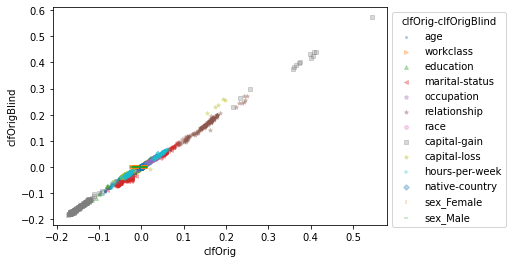

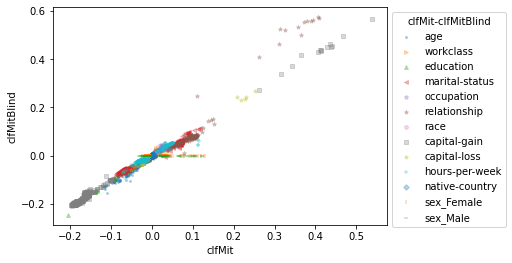

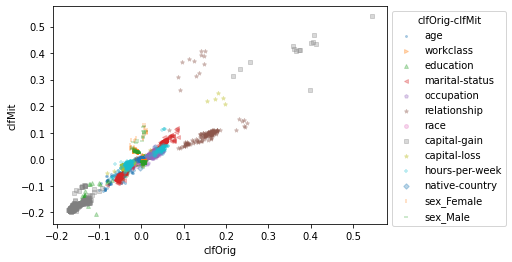

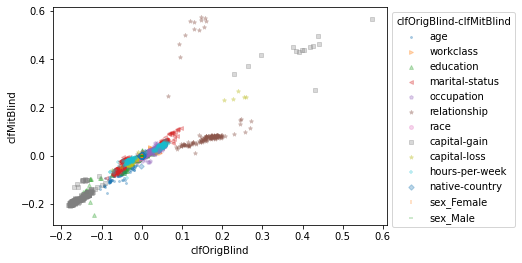

In [90]:
XAIPlots(shap_v,column_names,diffClfs=True)

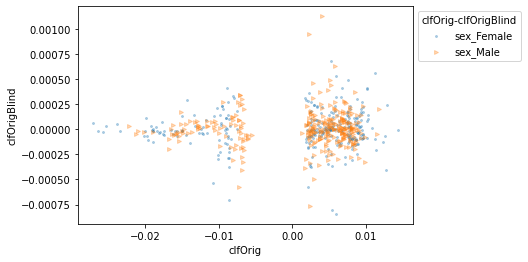

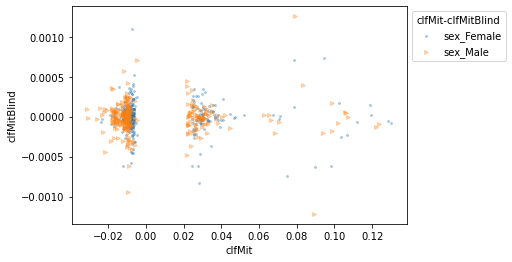

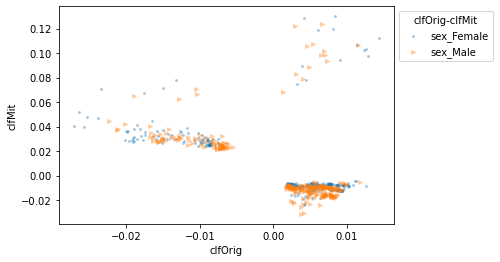

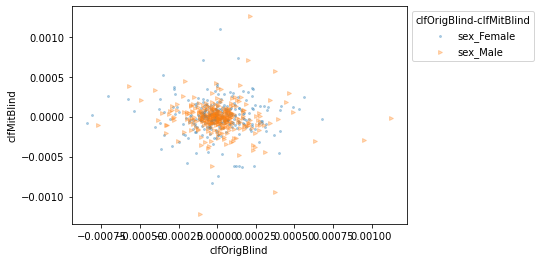

In [91]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [92]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [93]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [94]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [95]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.865301           -0.876693        0.061191   
workclass                   0.260744            0.167157        0.199392   
education                  -0.332657           -1.457397       -0.850366   
marital-status              6.649351            3.805963        5.232057   
occupation                 -0.286573            0.238742       -0.024040   
relationship               -4.168953           -2.324423       -3.443369   
race                       -0.023348           -0.119317       -0.096097   
capital-gain               -1.341614           -3.243872       -2.228026   
capital-loss               -1.748454           -1.721511       -1.598388   
hours-per-week              0.967042            0.511150        0.866942   
native-country             -0.001793           -0.051974       -0.031473   
sex_Female                  0.817374           -0.904723       -0.087349   
sex_Male                    0.522352           -0.782138       -0.259787   

                clfOrigBlind-clfMitBlind  
age                            -0.072584  
workclass                       0.228510  
education                      -0.939688  
marital-status                  5.223257  
occupation                     -0.023791  
relationship                   -3.050007  
race                           -0.046568  
capital-gain                   -2.357459  
capital-loss                   -1.871577  
hours-per-week                  0.611250  
native-country                 -0.022294  
sex_Female                      0.000000  
sex_Male                        0.000000

In [96]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002893            0.004513        0.012578   
workclass                   0.000757            0.000833        0.002035   
education                   0.002795            0.002614        0.004878   
marital-status              0.006819            0.005201        0.009312   
occupation                  0.001831            0.001940        0.005819   
relationship                0.009589            0.009736        0.058200   
race                        0.000246            0.000492        0.000474   
capital-gain                0.002395            0.003644        0.008923   
capital-loss                0.002046            0.001158        0.002098   
hours-per-week              0.002873            0.005380        0.008578   
native-country              0.000328            0.000169        0.000708   
sex_Female                  0.012435            0.014586        0.026897   
sex_Male                    0.008865            0.015617        0.024459   

                clfOrigBlind-clfMitBlind  
age                             0.013552  
workclass                       0.002408  
education                       0.005864  
marital-status                  0.008697  
occupation                      0.005860  
relationship                    0.071468  
race                            0.000653  
capital-gain                    0.010074  
capital-loss                    0.001660  
hours-per-week                  0.009478  
native-country                  0.000411  
sex_Female                      0.000000  
sex_Male                        0.000000

In [97]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.669863            0.843431        0.173568   
SA-Mean               0.010650            0.015101        0.025678   
NSA-Sum               1.513257            1.319836        1.330122   
NSA-Mean              0.002961            0.003243        0.010328   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   1.313362  
NSA-Mean                  0.011830

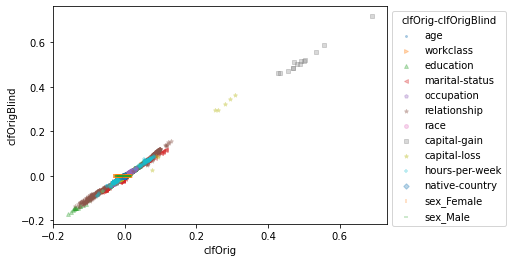

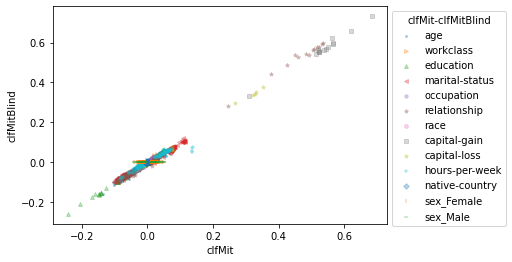

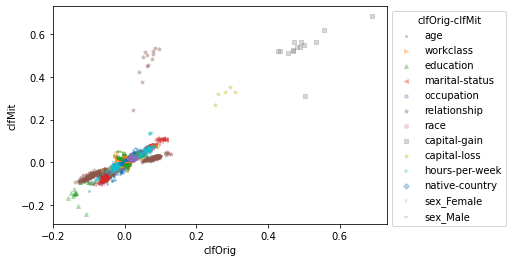

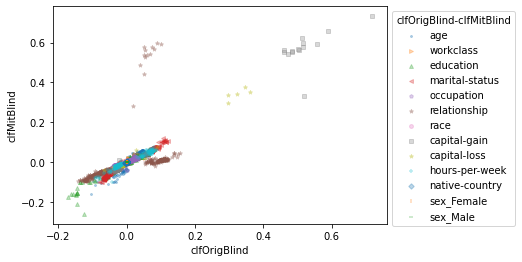

In [98]:
XAIPlots(shap_v,column_names,diffClfs=True)

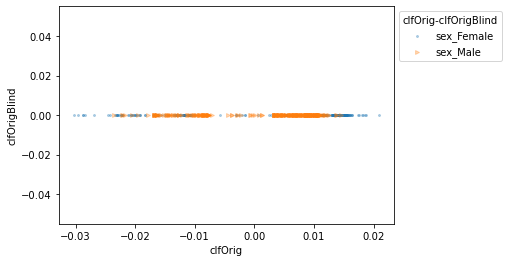

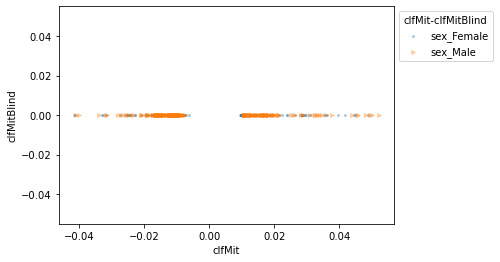

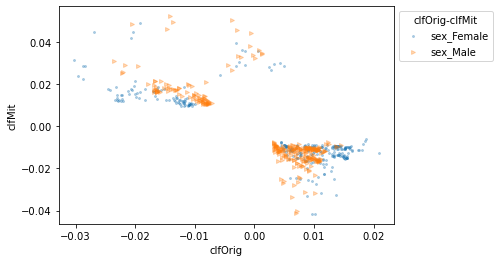

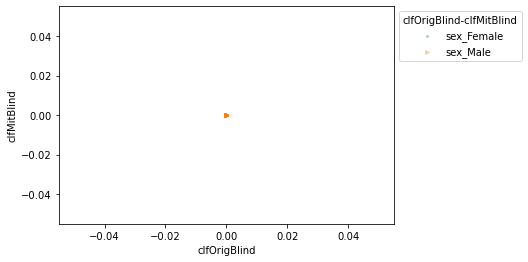

In [99]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [100]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [101]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [102]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [103]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -8.033080          -11.096579       -9.113999   
workclass                  -0.258943            0.231138       -0.214874   
education                  -3.771771           -1.710747       -2.824186   
marital-status              5.372899            7.016540        5.718372   
occupation                  2.554489            2.490374        2.809647   
relationship                9.425468            5.860885        7.277231   
race                        0.077622            0.180713        0.410380   
capital-gain             -112.209697         -120.196171     -114.318876   
capital-loss              -18.946663          -15.226615      -15.797679   
hours-per-week             -7.006079           -5.689704       -6.260094   
native-country              1.426270            0.915010        1.072046   
sex_Female                 -0.430265            1.771017        1.241774   
sex_Male                    0.033378            1.846425        1.386725   

                clfOrigBlind-clfMitBlind  
age                           -10.015661  
workclass                       0.187068  
education                      -2.658332  
marital-status                  6.671067  
occupation                      2.235216  
relationship                    8.009121  
race                           -0.152045  
capital-gain                 -118.086993  
capital-loss                  -18.375599  
hours-per-week                 -6.435689  
native-country                  1.269234  
sex_Female                      0.098977  
sex_Male                        0.493077

In [104]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.013336            0.012497        0.013503   
workclass                   0.010744            0.010245        0.010681   
education                   0.011168            0.012511        0.013247   
marital-status              0.014913            0.017651        0.027086   
occupation                  0.010375            0.010217        0.010662   
relationship                0.016171            0.014531        0.013449   
race                        0.010229            0.010285        0.009277   
capital-gain                0.010969            0.010482        0.016687   
capital-loss                0.010018            0.012501        0.014365   
hours-per-week              0.010815            0.011807        0.012795   
native-country              0.008889            0.009104        0.009353   
sex_Female                  0.013798            0.030131        0.038316   
sex_Male                    0.013497            0.029713        0.038953   

                clfOrigBlind-clfMitBlind  
age                             0.016341  
workclass                       0.010812  
education                       0.010901  
marital-status                  0.010621  
occupation                      0.011130  
relationship                    0.032872  
race                            0.010502  
capital-gain                    0.015025  
capital-loss                    0.010897  
hours-per-week                  0.012209  
native-country                  0.009543  
sex_Female                      0.010783  
sex_Male                        0.010846

In [105]:
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.231822            1.808721        1.314250   
SA-Mean               0.013648            0.029922        0.038635   
NSA-Sum              15.371180           15.510407       15.074308   
NSA-Mean              0.011602            0.011985        0.013737   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.296027  
SA-Mean                   0.010815  
NSA-Sum                  15.826911  
NSA-Mean                  0.013714

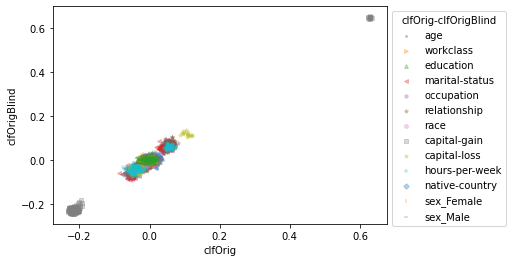

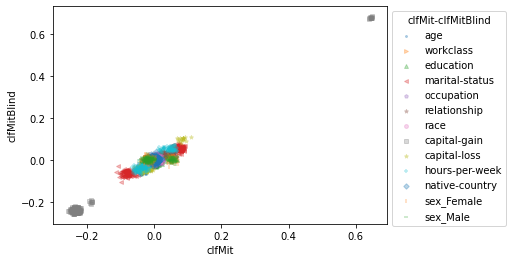

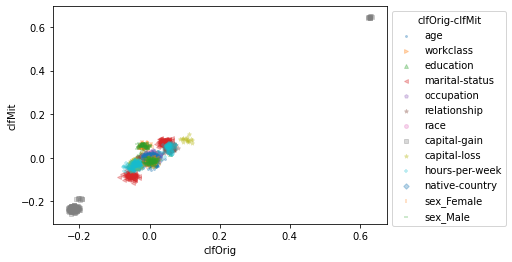

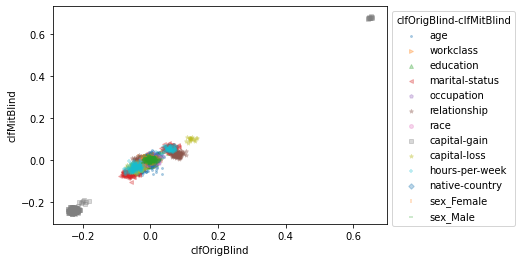

In [106]:
XAIPlots(lime_v,column_names,diffClfs=True)

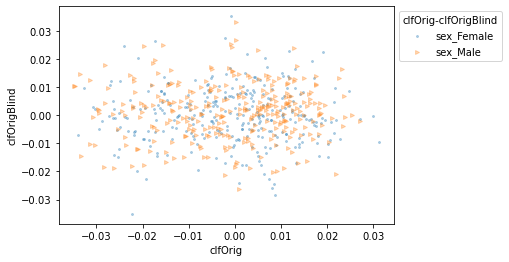

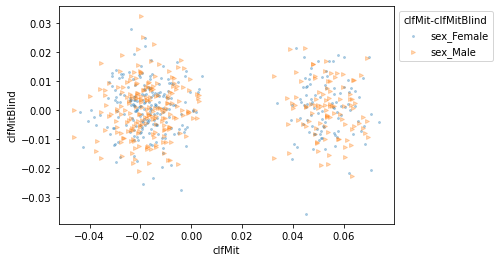

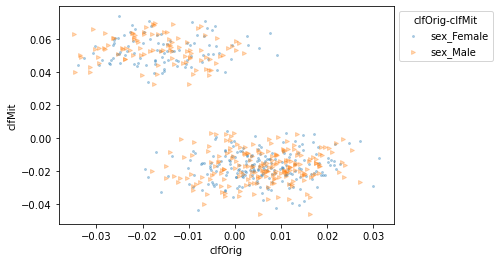

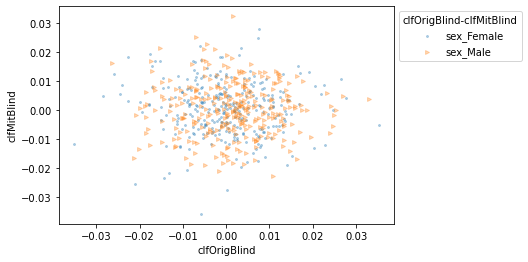

In [107]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [108]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [109]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [110]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [111]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -10.241451          -13.464636      -11.303183   
workclass                   0.458027            0.260540        0.377924   
education                  -7.587339           -8.273723       -7.794041   
marital-status             -4.240404            0.263214       -1.498173   
occupation                  9.251432            4.867536        6.564388   
relationship               37.234939           27.150333       32.165614   
race                       -0.127323           -0.195932       -0.174353   
capital-gain              -75.560127          -81.239499      -74.345859   
capital-loss              -19.042208          -15.252600      -17.452000   
hours-per-week             -3.374550           -2.052809       -2.682038   
native-country              0.225575            0.076124        0.091504   
sex_Female                  0.327734            1.599263        1.933929   
sex_Male                    0.527236            0.905547        1.436570   

                clfOrigBlind-clfMitBlind  
age                           -12.402904  
workclass                       0.340642  
education                      -8.067020  
marital-status                 -2.479016  
occupation                      7.554580  
relationship                   32.219658  
race                           -0.148902  
capital-gain                  -82.453766  
capital-loss                  -16.842808  
hours-per-week                 -2.745321  
native-country                  0.210196  
sex_Female                     -0.006932  
sex_Male                       -0.003787

In [112]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002596            0.006147        0.007731   
workclass                   0.000589            0.000784        0.001389   
education                   0.003101            0.003103        0.004420   
marital-status              0.007359            0.009448        0.012140   
occupation                  0.002094            0.003350        0.008835   
relationship                0.004266            0.015231        0.041179   
race                        0.000312            0.000422        0.000541   
capital-gain                0.009011            0.021168        0.013009   
capital-loss                0.003677            0.004419        0.005389   
hours-per-week              0.003393            0.005560        0.010221   
native-country              0.000297            0.000425        0.000761   
sex_Female                  0.008334            0.019927        0.027451   
sex_Male                    0.007409            0.020593        0.027514   

                clfOrigBlind-clfMitBlind  
age                             0.011136  
workclass                       0.001777  
education                       0.005824  
marital-status                  0.012891  
occupation                      0.007118  
relationship                    0.058433  
race                            0.000482  
capital-gain                    0.024668  
capital-loss                    0.009199  
hours-per-week                  0.008723  
native-country                  0.000625  
sex_Female                      0.000177  
sex_Male                        0.000178

In [113]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.427485            1.252405        1.685250   
SA-Mean               0.007871            0.020260        0.027483   
NSA-Sum              15.213034           13.917904       14.040825   
NSA-Mean              0.003336            0.006369        0.009601   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.005360  
SA-Mean                   0.000178  
NSA-Sum                  15.042256  
NSA-Mean                  0.012807

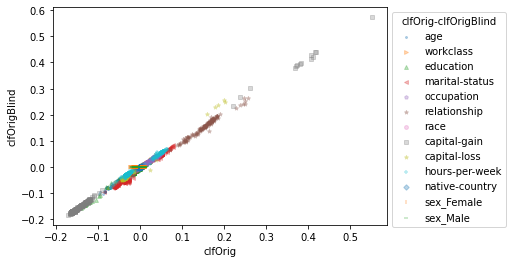

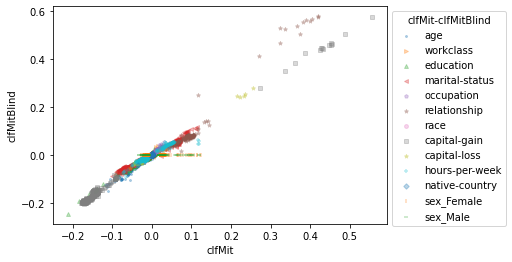

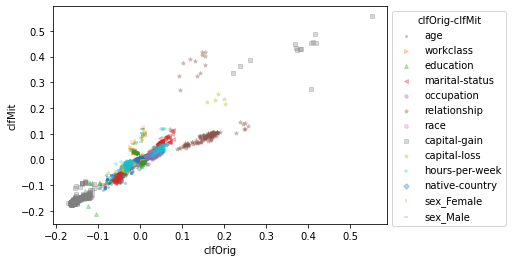

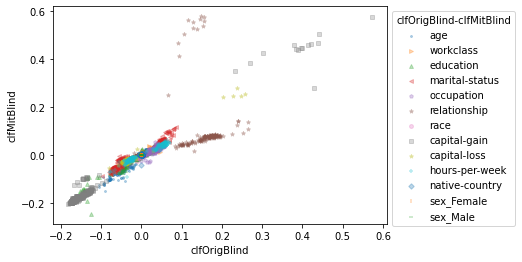

In [114]:
XAIPlots(shap_v,column_names,diffClfs=True)

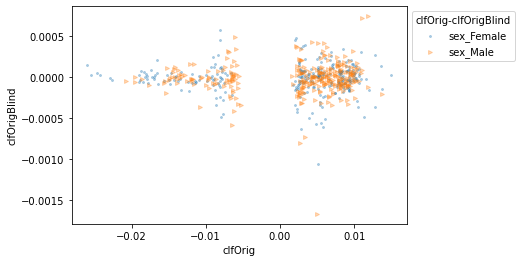

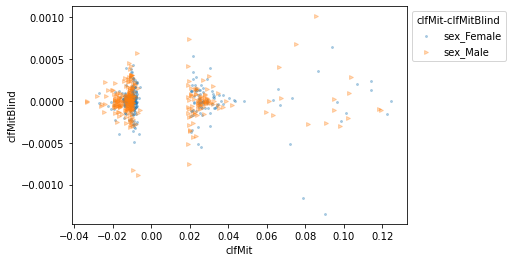

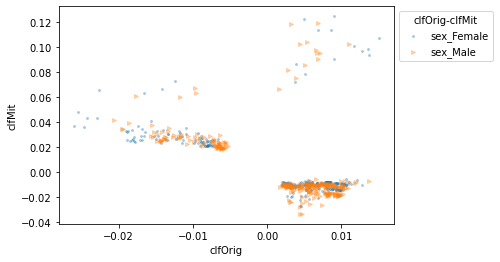

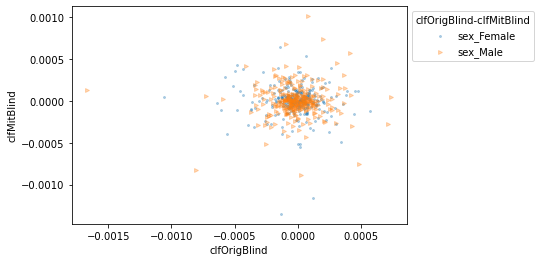

In [115]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [116]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [117]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [118]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [119]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.865301           -0.876693        0.061191   
workclass                   0.260744            0.167157        0.199392   
education                  -0.332657           -1.457397       -0.850366   
marital-status              6.649351            3.805963        5.232057   
occupation                 -0.286573            0.238742       -0.024040   
relationship               -4.168953           -2.324423       -3.443369   
race                       -0.023348           -0.119317       -0.096097   
capital-gain               -1.341614           -3.243872       -2.228026   
capital-loss               -1.748454           -1.721511       -1.598388   
hours-per-week              0.967042            0.511150        0.866942   
native-country             -0.001793           -0.051974       -0.031473   
sex_Female                  0.817374           -0.904723       -0.087349   
sex_Male                    0.522352           -0.782138       -0.259787   

                clfOrigBlind-clfMitBlind  
age                            -0.072584  
workclass                       0.228510  
education                      -0.939688  
marital-status                  5.223257  
occupation                     -0.023791  
relationship                   -3.050007  
race                           -0.046568  
capital-gain                   -2.357459  
capital-loss                   -1.871577  
hours-per-week                  0.611250  
native-country                 -0.022294  
sex_Female                      0.000000  
sex_Male                        0.000000

In [120]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002893            0.004513        0.012578   
workclass                   0.000757            0.000833        0.002035   
education                   0.002795            0.002614        0.004878   
marital-status              0.006819            0.005201        0.009312   
occupation                  0.001831            0.001940        0.005819   
relationship                0.009589            0.009736        0.058200   
race                        0.000246            0.000492        0.000474   
capital-gain                0.002395            0.003644        0.008923   
capital-loss                0.002046            0.001158        0.002098   
hours-per-week              0.002873            0.005380        0.008578   
native-country              0.000328            0.000169        0.000708   
sex_Female                  0.012435            0.014586        0.026897   
sex_Male                    0.008865            0.015617        0.024459   

                clfOrigBlind-clfMitBlind  
age                             0.013552  
workclass                       0.002408  
education                       0.005864  
marital-status                  0.008697  
occupation                      0.005860  
relationship                    0.071468  
race                            0.000653  
capital-gain                    0.010074  
capital-loss                    0.001660  
hours-per-week                  0.009478  
native-country                  0.000411  
sex_Female                      0.000000  
sex_Male                        0.000000

In [121]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.669863            0.843431        0.173568   
SA-Mean               0.010650            0.015101        0.025678   
NSA-Sum               1.513257            1.319836        1.330122   
NSA-Mean              0.002961            0.003243        0.010328   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   1.313362  
NSA-Mean                  0.011830

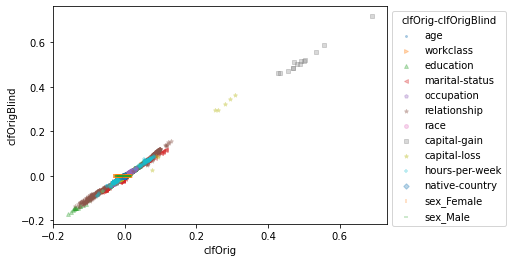

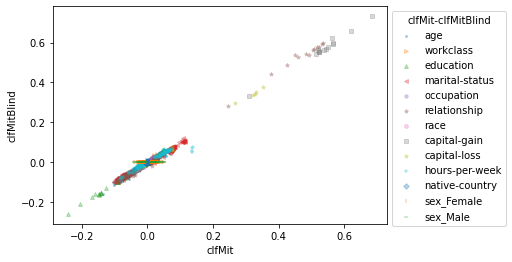

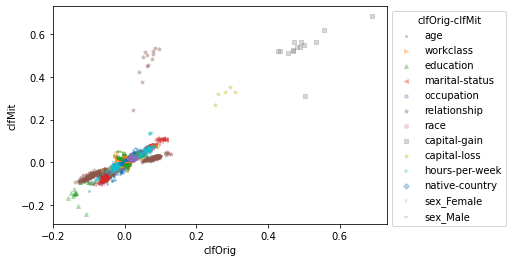

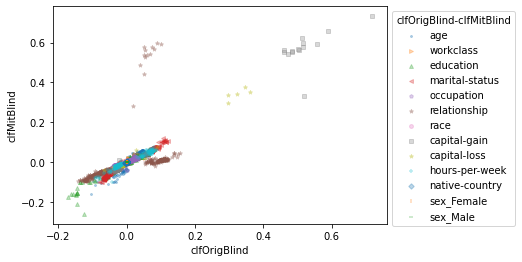

In [122]:
XAIPlots(shap_v,column_names,diffClfs=True)

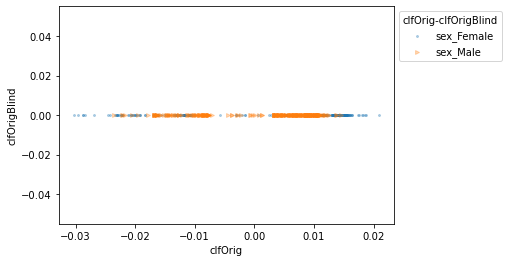

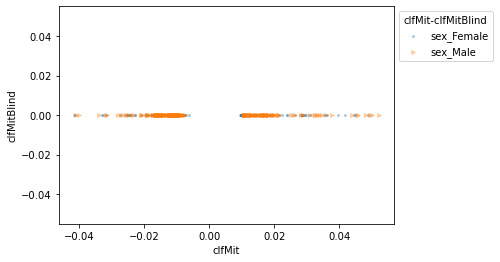

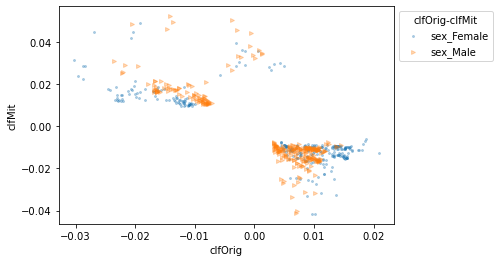

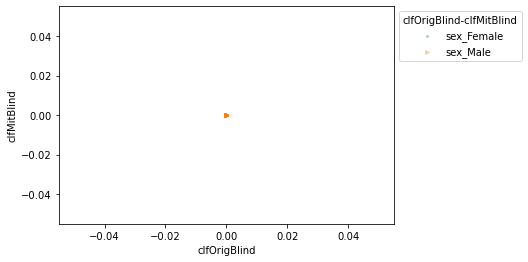

In [123]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [124]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [125]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [126]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [127]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -8.037907          -11.708072       -9.091022   
workclass                  -0.256917            0.294940       -0.150816   
education                  -3.762182           -4.305478       -4.062648   
marital-status              5.383034            3.548368        3.786305   
occupation                  2.562062            1.616753        2.305932   
relationship                9.434503            6.008364        7.211855   
race                        0.073377            0.338569        0.473173   
capital-gain             -111.378399         -134.002543     -118.382452   
capital-loss              -19.040221          -15.814046      -15.390341   
hours-per-week             -7.017445           -5.330872       -5.564129   
native-country              1.430292            0.889690        1.106768   
sex_Female                 -0.421743            1.180373        0.704559   
sex_Male                    0.032102            1.136661        0.706273   

                clfOrigBlind-clfMitBlind  
age                           -10.654958  
workclass                       0.188839  
education                      -4.005012  
marital-status                  5.145097  
occupation                      1.872883  
relationship                    8.231011  
race                           -0.061228  
capital-gain                 -126.998490  
capital-loss                  -19.463926  
hours-per-week                 -6.784188  
native-country                  1.213214  
sex_Female                      0.054071  
sex_Male                        0.462490

In [128]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.013340            0.014233        0.012522   
workclass                   0.010676            0.010097        0.010824   
education                   0.011229            0.011326        0.010518   
marital-status              0.014980            0.016433        0.020142   
occupation                  0.010380            0.009576        0.010679   
relationship                0.016213            0.011220        0.011184   
race                        0.010293            0.010144        0.009299   
capital-gain                0.012995            0.020712        0.035441   
capital-loss                0.011864            0.013420        0.011933   
hours-per-week              0.010808            0.011378        0.012024   
native-country              0.008924            0.008764        0.009292   
sex_Female                  0.013767            0.028739        0.037003   
sex_Male                    0.013416            0.029387        0.038438   

                clfOrigBlind-clfMitBlind  
age                             0.019444  
workclass                       0.010365  
education                       0.012908  
marital-status                  0.012469  
occupation                      0.011102  
relationship                    0.023724  
race                            0.010618  
capital-gain                    0.043876  
capital-loss                    0.011132  
hours-per-week                  0.013667  
native-country                  0.009464  
sex_Female                      0.010417  
sex_Male                        0.010647

In [129]:
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.226922            1.158517        0.705416   
SA-Mean               0.013591            0.029063        0.037721   
NSA-Sum              15.306940           16.714336       15.229586   
NSA-Mean              0.011973            0.012482        0.013987   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.258281  
SA-Mean                   0.010532  
NSA-Sum                  16.783531  
NSA-Mean                  0.016252

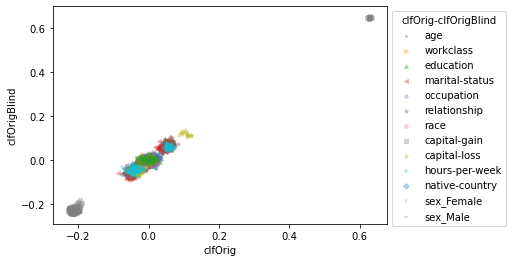

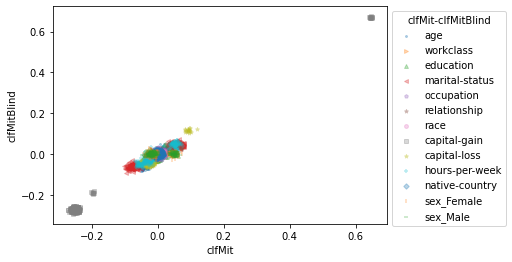

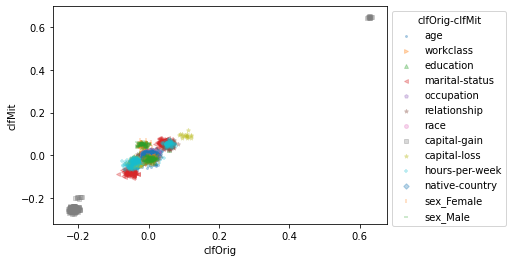

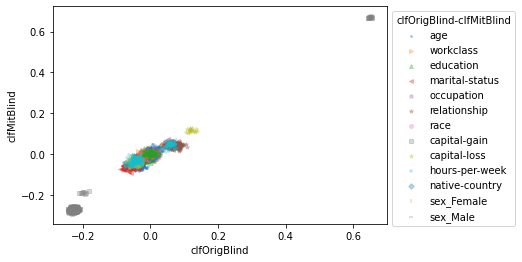

In [130]:
XAIPlots(lime_v,column_names,diffClfs=True)

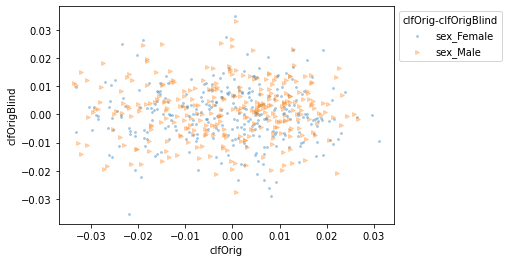

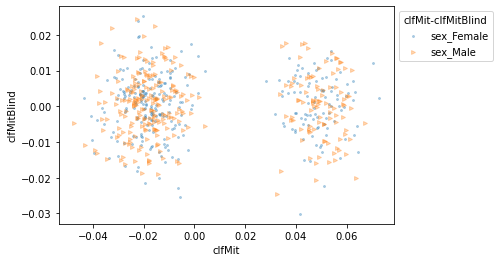

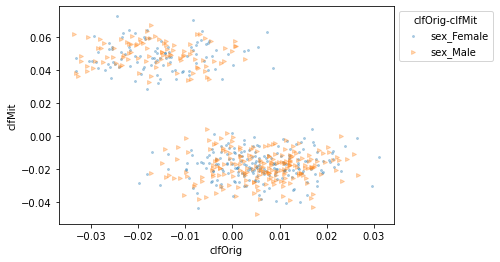

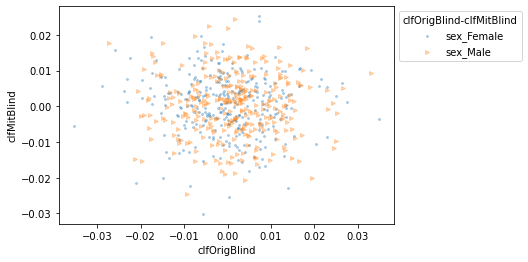

In [131]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [132]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [133]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [134]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -9.986126     -12.576945                 -10.130833   
workclass              0.514269       0.273446                   0.403924   
education             -7.621136      -8.447455                  -7.563660   
marital-status        -1.070706       0.095462                  -4.372420   
occupation             8.778197       4.399375                   9.355518   
relationship          36.492670      27.283953                  38.446531   
race                  -0.171953      -0.156062                  -0.121391   
capital-gain         -74.475602     -80.598575                 -78.499848   
capital-loss         -19.568926     -15.122660                 -17.573945   
hours-per-week        -4.375224      -1.985856                  -3.400790   
native-country         0.181981      -0.001041                   0.266744   
sex_Female             0.501243       3.941523                  -0.006295   
sex_Male               0.809232       2.320671                  -0.001454   

                clfMitBlind-clfMitBlind  
age                          -14.713754  
workclass                      0.268193  
education                     -8.116257  
marital-status                 0.858042  
occupation                     5.922453  
relationship                  27.479434  
race                          -0.224627  
capital-gain                 -88.498330  
capital-loss                 -14.740196  
hours-per-week                -2.317208  
native-country                 0.178246  
sex_Female                    -0.002242  
sex_Male                      -0.003702

In [135]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001036       0.001247                   0.001484   
workclass              0.000174       0.000223                   0.000170   
education              0.001879       0.000886                   0.001880   
marital-status         0.004301       0.002436                   0.005824   
occupation             0.001050       0.001216                   0.000384   
relationship           0.002887       0.002248                   0.004452   
race                   0.000190       0.000298                   0.000198   
capital-gain           0.003563       0.017712                   0.002791   
capital-loss           0.003495       0.004406                   0.006639   
hours-per-week         0.001554       0.001859                   0.001881   
native-country         0.000166       0.000201                   0.000178   
sex_Female             0.000579       0.002475                   0.000172   
sex_Male               0.000864       0.001703                   0.000166   

                clfMitBlind-clfMitBlind  
age                            0.001665  
workclass                      0.000229  
education                      0.000711  
marital-status                 0.001155  
occupation                     0.000758  
relationship                   0.001367  
race                           0.000217  
capital-gain                   0.004347  
capital-loss                   0.002063  
hours-per-week                 0.001141  
native-country                 0.000214  
sex_Female                     0.000184  
sex_Male                       0.000171

In [136]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.655238       3.131097                   0.003875   
SA-Mean          0.000721       0.002089                   0.000169   
NSA-Sum         14.839708      13.721894                  15.466873   
NSA-Mean         0.001845       0.002976                   0.002353   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.002972  
SA-Mean                  0.000177  
NSA-Sum                 14.846976  
NSA-Mean                 0.001261

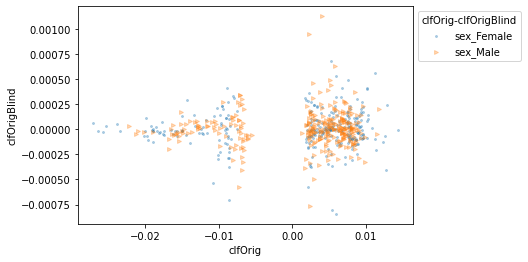

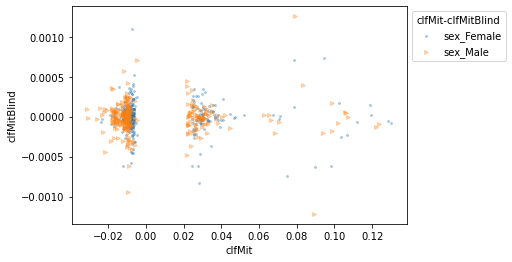

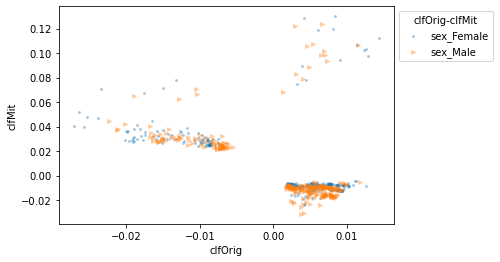

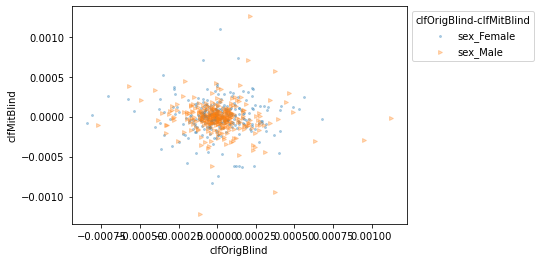

In [137]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [138]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [139]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [140]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.967960      -0.845577                   0.762642   
workclass              0.243707       0.155076                   0.277780   
education             -0.320828      -1.379903                  -0.344485   
marital-status         6.532091       3.932023                   6.766611   
occupation            -0.218901       0.170821                  -0.354244   
relationship          -5.753935      -1.132804                  -2.583972   
race                  -0.051772      -0.140422                   0.005077   
capital-gain          -1.300993      -3.155060                  -1.382234   
capital-loss          -1.601844      -1.594932                  -1.895065   
hours-per-week         0.923290       0.810594                   1.010795   
native-country        -0.004685      -0.058261                   0.001098   
sex_Female             1.634749      -1.809446                   0.000000   
sex_Male               1.044703      -1.564277                   0.000000   

                clfMitBlind-clfMitBlind  
age                           -0.907810  
workclass                      0.179239  
education                     -1.534892  
marital-status                 3.679903  
occupation                     0.306663  
relationship                  -3.516041  
race                          -0.098212  
capital-gain                  -3.332683  
capital-loss                  -1.848090  
hours-per-week                 0.211706  
native-country                -0.045687  
sex_Female                     0.000000  
sex_Male                       0.000000

In [141]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                         0.0            0.0                        0.0   
workclass                   0.0            0.0                        0.0   
education                   0.0            0.0                        0.0   
marital-status              0.0            0.0                        0.0   
occupation                  0.0            0.0                        0.0   
relationship                0.0            0.0                        0.0   
race                        0.0            0.0                        0.0   
capital-gain                0.0            0.0                        0.0   
capital-loss                0.0            0.0                        0.0   
hours-per-week              0.0            0.0                        0.0   
native-country              0.0            0.0                        0.0   
sex_Female                  0.0            0.0                        0.0   
sex_Male                    0.0            0.0                        0.0   

                clfMitBlind-clfMitBlind  
age                                 0.0  
workclass                           0.0  
education                           0.0  
marital-status                      0.0  
occupation                          0.0  
relationship                        0.0  
race                                0.0  
capital-gain                        0.0  
capital-loss                        0.0  
hours-per-week                      0.0  
native-country                      0.0  
sex_Female                          0.0  
sex_Male                            0.0

In [142]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           1.339726       1.686861                   0.000000   
SA-Mean          0.000000       0.000000                   0.000000   
NSA-Sum          1.629091       1.215952                   1.398546   
NSA-Mean         0.000000       0.000000                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  1.423721  
NSA-Mean                 0.000000

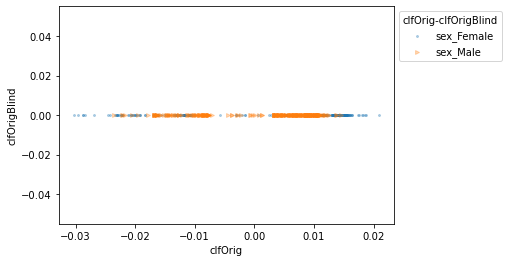

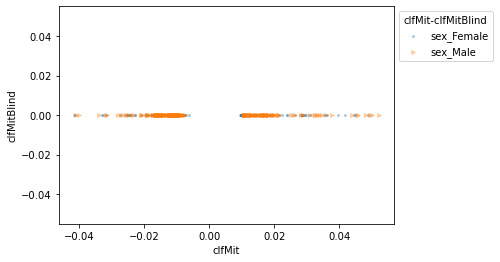

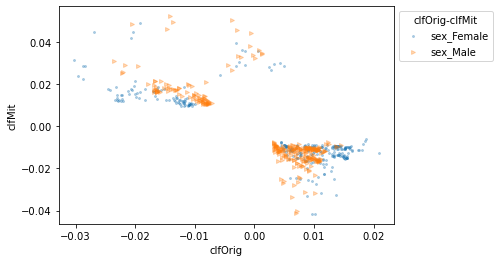

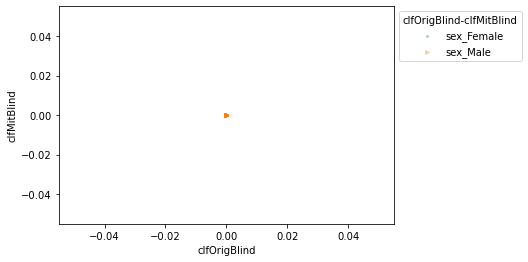

In [143]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [144]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [145]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [146]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -7.978725     -10.226296                  -8.092263   
workclass             -0.539316       0.173627                   0.023456   
education             -4.652268      -2.234566                  -2.881685   
marital-status         3.633222       5.871454                   7.122711   
occupation             3.019329       2.096251                   2.097222   
relationship           7.983068       6.506018                  10.876902   
race                   0.349774       0.533780                  -0.198775   
capital-gain        -109.088479    -123.612849                -114.499617   
capital-loss         -17.764542     -13.423478                 -20.222342   
hours-per-week        -6.507492      -5.316732                  -7.516032   
native-country         1.660319       0.518495                   1.196242   
sex_Female            -0.753350       2.699683                  -0.098658   
sex_Male              -0.718979       2.811977                   0.784459   

                clfMitBlind-clfMitBlind  
age                          -12.578356  
workclass                      0.352451  
education                     -3.781659  
marital-status                 4.693454  
occupation                     2.010876  
relationship                   5.363231  
race                          -0.014497  
capital-gain                -130.585865  
capital-loss                 -17.617183  
hours-per-week                -5.703844  
native-country                 1.286205  
sex_Female                     0.251707  
sex_Male                       0.171109

In [147]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.000598       0.006760                   0.000249   
workclass              0.000597       0.002064                   0.000262   
education              0.000605       0.009175                   0.000237   
marital-status         0.000564       0.008945                   0.000270   
occupation             0.000612       0.003659                   0.000240   
relationship           0.000602       0.005505                   0.000247   
race                   0.000536       0.002131                   0.000262   
capital-gain           0.002792       0.016439                   0.000223   
capital-loss           0.003859       0.004423                   0.003854   
hours-per-week         0.000588       0.005760                   0.000255   
native-country         0.000569       0.002118                   0.000231   
sex_Female             0.000559       0.002990                   0.000268   
sex_Male               0.000558       0.002896                   0.000238   

                clfMitBlind-clfMitBlind  
age                            0.010322  
workclass                      0.002870  
education                      0.008091  
marital-status                 0.007389  
occupation                     0.003852  
relationship                   0.011705  
race                           0.002716  
capital-gain                   0.030332  
capital-loss                   0.006962  
hours-per-week                 0.004803  
native-country                 0.002685  
sex_Female                     0.003084  
sex_Male                       0.003255

In [148]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.736165       2.755830                   0.441558   
SA-Mean          0.000558       0.002943                   0.000253   
NSA-Sum         14.834230      15.501231                  15.884295   
NSA-Mean         0.001084       0.006089                   0.000575   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.211408  
SA-Mean                  0.003169  
NSA-Sum                 16.726147  
NSA-Mean                 0.008339

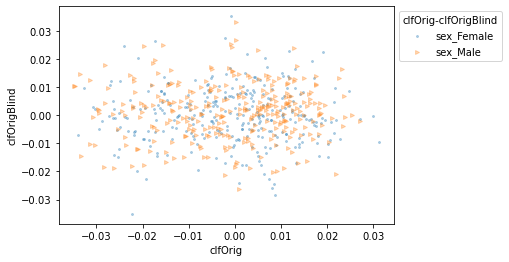

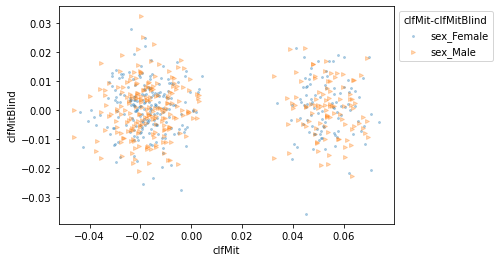

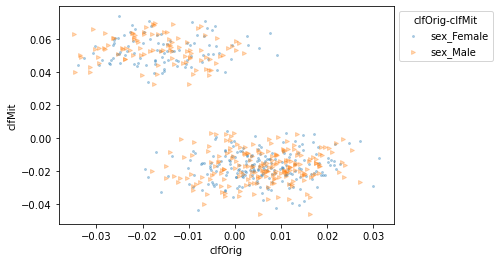

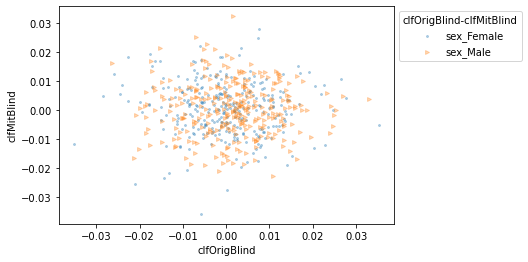

In [149]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)